In [1]:
%load_ext autoreload
%autoreload 2 

from utils.data_download import download_data_with_animation, unzip_data
from utils.read_tensorflow_data import read_tf_data, data_type, create_tf_dataset
import os
from typing import List, Tuple, TypedDict, Dict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from keras.models import Sequential
from keras import layers, models
from keras.callbacks import ModelCheckpoint
from keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    concatenate,
    Dropout,
    Dense,
    Flatten,
    BatchNormalization,
    Activation,
    AveragePooling2D,
    Add,
    Dropout,
    MaxPool2D,
    GlobalAveragePooling2D,
)
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.metrics import Recall
from keras.metrics import Precision

2024-05-11 04:09:16.868789: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-11 04:09:17.008885: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Download data


In [2]:
# data will only be downloaed when the output file does not exist. In this case the file is ./data/data.zip
# if there is any issues remove everything under ./data and run the code again
url = "https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F27069%2F46974%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240422%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240422T195446Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D27f3460b8b1512fc77d5fa919e5f7471c55fe552037869b78d43ddb33f80831a03ed39077650fd90b858ed2f101d2f468053a7199462f3513d0b8dcc100674f5469a5c0a008151acc0041a3bc7074be4d33b2d65462aa5f4e6988f27c8e89737c60fe8dfc0a245cd3915303c5e4488db745aafae9a1a4e6caf34a0000fed7eec3d0a6723983064916e2e2993cc94612de815d32cc9d345622158e7569c4cc0d541cb2b5d0d705461e3821e7c881248dc22390f1a2fed45f2794a442fd3bbb4d727151d4eb5390f37b3a1d167facb8ea5c5b8b79a054e93e90371a96b2c1e3be8549bd09c9a37278fcfeb38aba093157906271145184ddc0f32799f1013733631"
download_data_with_animation(url, "./data/data.zip")
unzip_data("./data/data.zip", "./data/unzipped_data/")

./data/data.zip already exists, skipping download.
./data/unzipped_data/ already exists, skipping unzip.


In [3]:
data_files = [] 
for root, dirs, files in os.walk("./data/unzipped_data/") :
	for file in files:
		data_files.append( os.path.join(root, file).replace('\\', '/') )
  
data_files


['./data/unzipped_data/cv10_labels.npy',
 './data/unzipped_data/test10_labels.npy',
 './data/unzipped_data/cv10_data/cv10_data.npy',
 './data/unzipped_data/test10_data/test10_data.npy',
 './data/unzipped_data/training10_0/training10_0.tfrecords',
 './data/unzipped_data/training10_1/training10_1.tfrecords',
 './data/unzipped_data/training10_2/training10_2.tfrecords',
 './data/unzipped_data/training10_3/training10_3.tfrecords',
 './data/unzipped_data/training10_4/training10_4.tfrecords']

In [4]:
training_files = [file for file in data_files if "training" in file]
training_files

['./data/unzipped_data/training10_0/training10_0.tfrecords',
 './data/unzipped_data/training10_1/training10_1.tfrecords',
 './data/unzipped_data/training10_2/training10_2.tfrecords',
 './data/unzipped_data/training10_3/training10_3.tfrecords',
 './data/unzipped_data/training10_4/training10_4.tfrecords']

# Loading training data
Read the data from the training files 

The training data is being given in tfrecords (tensorflow files). need to convert it to numpy arrays ( The function is created under utils)


In [5]:
training_data :data_type = {"label": [], "data": []}   

for training_file in training_files:
	read_tf_data( training_file, training_data )

2024-05-11 04:09:20.621829: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-11 04:09:20.668961: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-11 04:09:20.669011: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-11 04:09:20.672805: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-11 04:09:20.672921: I external/local_xla/xla/stream_executor

# Data Visualization 

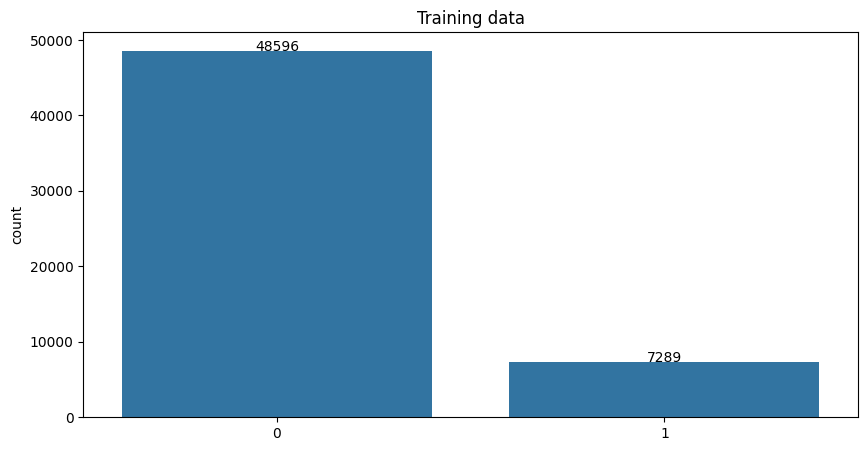

In [6]:
plt.figure(figsize=(10, 5))

sns.countplot(x=training_data['label'])
plt.title("Training data")
# add labels on top of the data 
# add labels on top of the data( note there is only 2 cathegories 1, 0) 
for i in range(2):
	plt.text(i, training_data['label'].count(i), training_data['label'].count(i), ha = 'center')  # type: ignore
plt.show()


# Data augmentation
Handling imbalanced datasets

In [7]:
def augment(image): 
    with tf.device("/CPU:0"):  
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        image = tf.image.random_brightness(image, max_delta=0.1)
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
        image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))  # Randomly rotate the image
        image = tf.image.random_jpeg_quality(image, min_jpeg_quality=80, max_jpeg_quality=100)
        return image
    
augmented_images = []
augmented_labels = []

for label, image in zip(training_data["label"], training_data["data"]):
    if label == 1:
        augmented_image1 = augment(image)
        augmented_images.append(augmented_image1)
        augmented_labels.append(label)


training_data["label"].extend(augmented_labels)
training_data["data"].extend(augmented_images)

2024-05-11 04:10:10.895467: E tensorflow/core/util/util.cc:131] oneDNN supports DT_UINT8 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


In [8]:
# shuffle the data 
import random

def shuffle(data_labels:data_type):
    # Create a list of indices from 0 to the length of data
    indices = list(range(len(data_labels['data'])))

    # Shuffle the indices
    random.shuffle(indices)

    # Use the shuffled indices to reorder data and labels
    shuffled_data = [data_labels['data'][i] for i in indices]
    shuffled_labels = [data_labels["label"][i] for i in indices]

    return shuffled_data, shuffled_labels

# training_data['data'], training_data["label"] = shuffle(training_data)

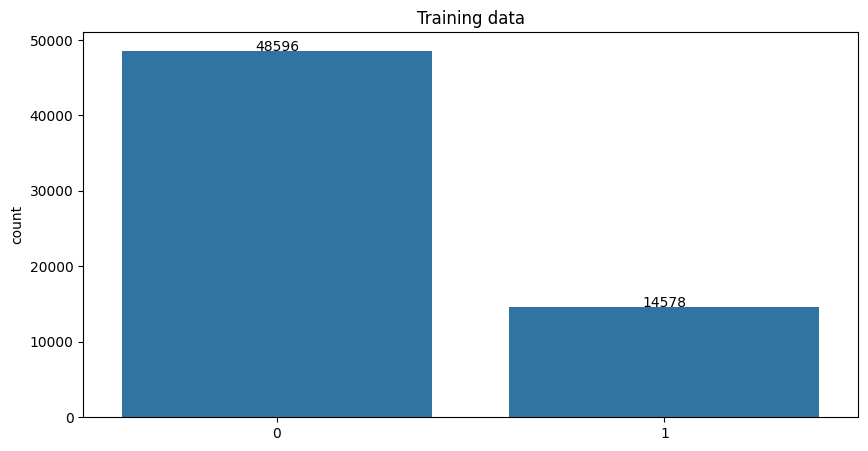

In [9]:
plt.figure(figsize=(10, 5))

sns.countplot(x=training_data['label'])
plt.title("Training data")
# add labels on top of the data 
# add labels on top of the data( note there is only 2 cathegories 1, 0) 
for i in range(2):
	plt.text(i, training_data['label'].count(i), training_data['label'].count(i), ha = 'center')  # type: ignore
plt.show()


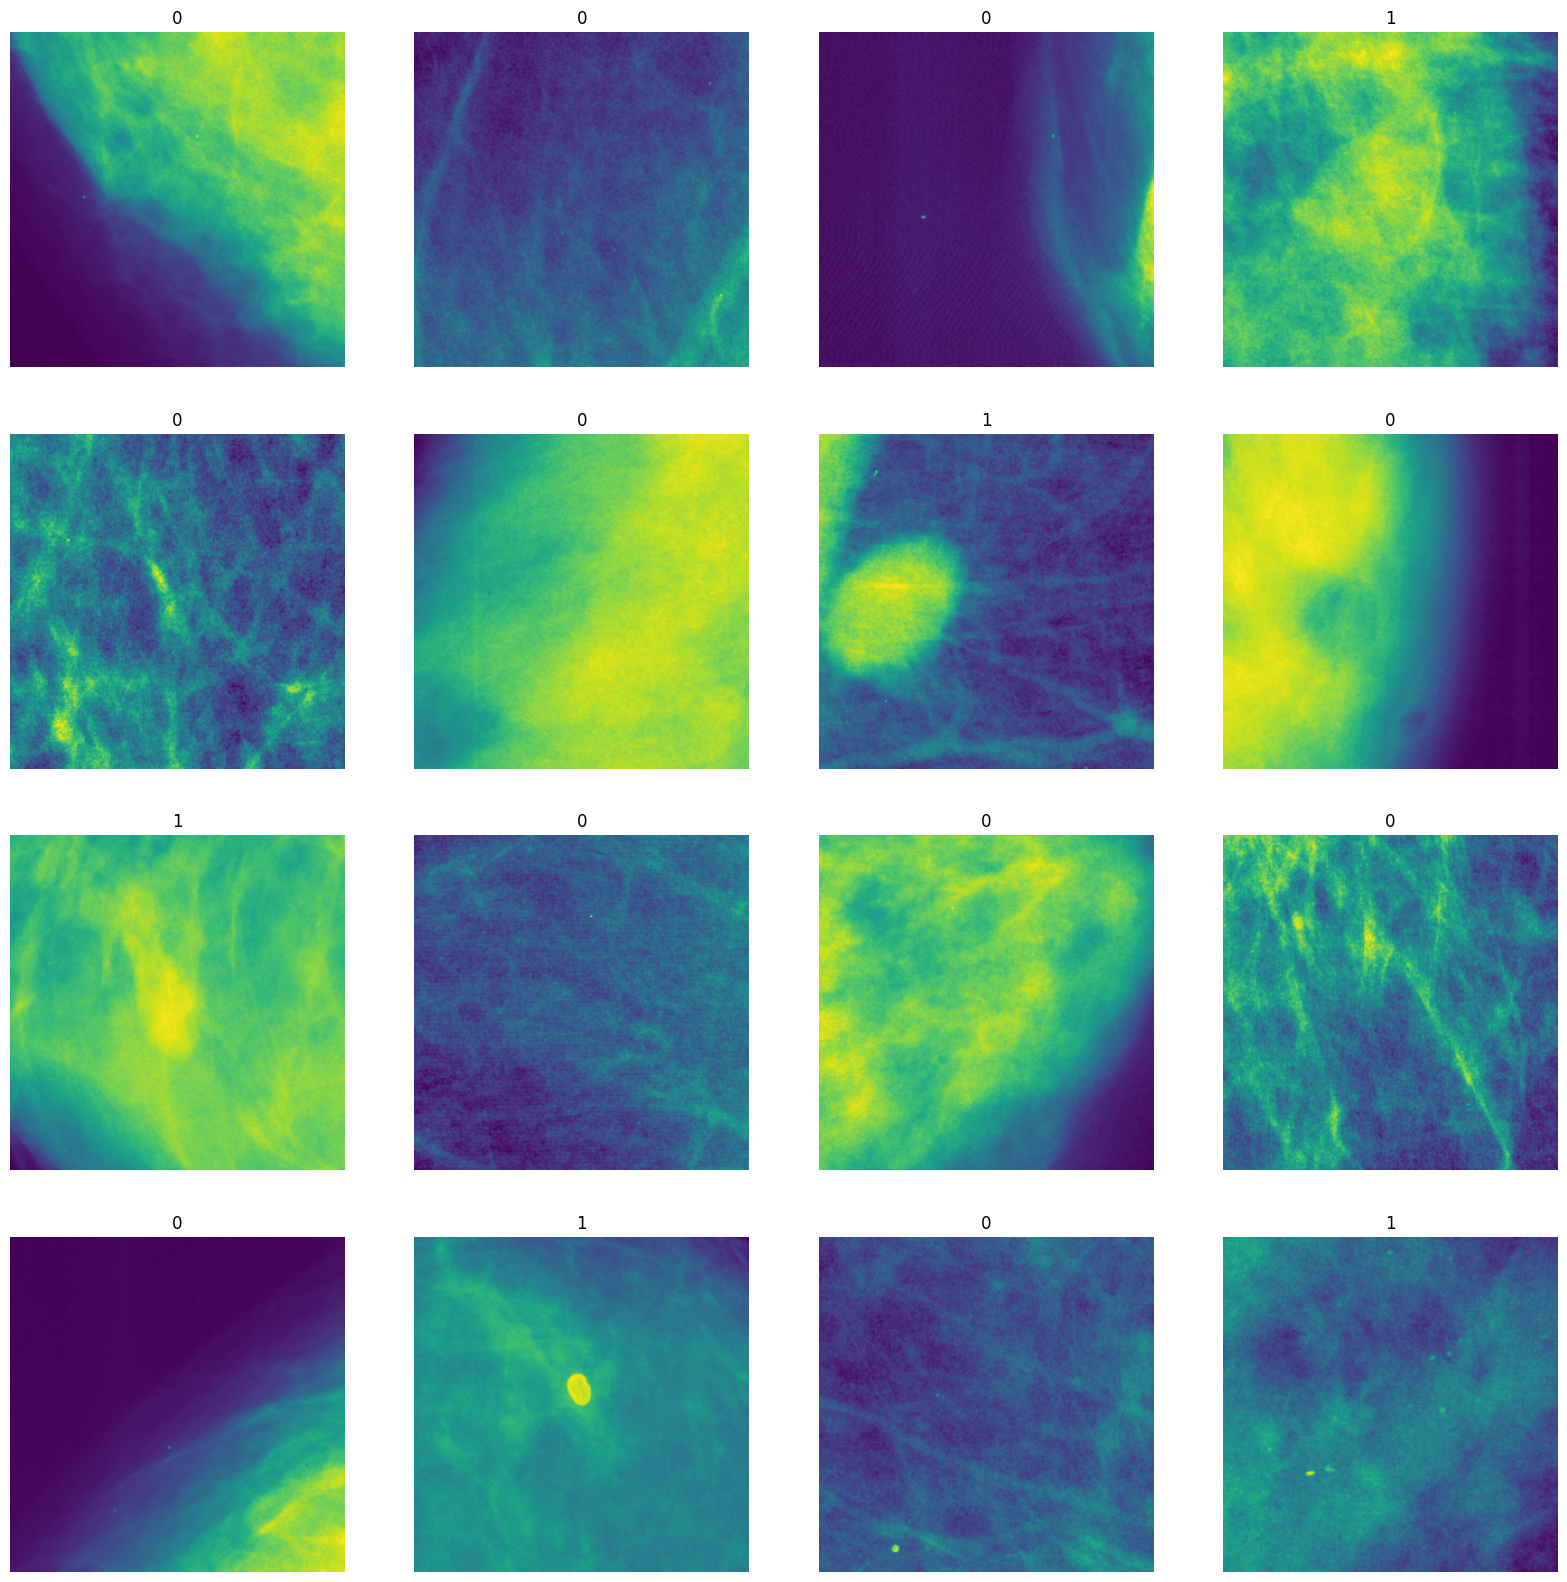

In [10]:
nrows = 4
ncols = 4

plt.figure(figsize=(20, 20))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(training_data["data"][i], )
    plt.title(str(training_data["label"][i]))
    # Remove the axis
    plt.axis('off')

# Show the plot
# plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

# Loaing test data

In [11]:
test_files =  './data/unzipped_data/test10_data/test10_data.npy'
test_files_labels =  './data/unzipped_data/test10_labels.npy'

cross_validation_files =  './data/unzipped_data/cv10_data/cv10_data.npy'
cross_validation_files_labels = './data/unzipped_data/cv10_labels.npy'



# Note this data is ng, cv_data only contains masses, test_data only contains calcifications. 
test_data_ng = np.load( test_files)
test_data_labels = np.load(  test_files_labels) 
cv_data_ng = np.load( cross_validation_files)
cv_data_labels = np.load( cross_validation_files_labels)


# Fixing cv_data and test_data 
The data from CV only contains only calcifications and test files only contain masses.  

"**Note** - The data has been separated into training and test as per the division in the CBIS-DDSM dataset. The test files have been divided equally into test and validation data. However the split between test and validation data was done incorrectly, resulted in the test numpy files containing only masses and the validation files containing only calcifications. These files should be combined in order to have balanced and complete test data.
"

In [12]:
# 
cv_data : data_type = {'data': [], 'label': []}
test_data : data_type = {'data': [], 'label': []}
n_test = []  # data, label 
n_cv = [] # data, label 
for i in range( len(cv_data_ng)):
	if i%2: # odd 	
		n_test.append(   (cv_data_ng[i], cv_data_labels[i])   )
		n_test.append(   (test_data_ng[i], test_data_labels[i])   )
	else:
		n_cv.append(   (cv_data_ng[i], cv_data_labels[i])   )
		n_cv.append(   (test_data_ng[i], test_data_labels[i])   )

cv_data['data'] = [x[0] for x in n_cv]
cv_data['label'] = [np.int8(1) if x[1]>0 else np.int8(0) for x in n_cv]

test_data['data'] = [x[0] for x in n_test]
test_data['label'] = [np.int8(1) if x[1]>0 else np.int8(0) for x in n_test]

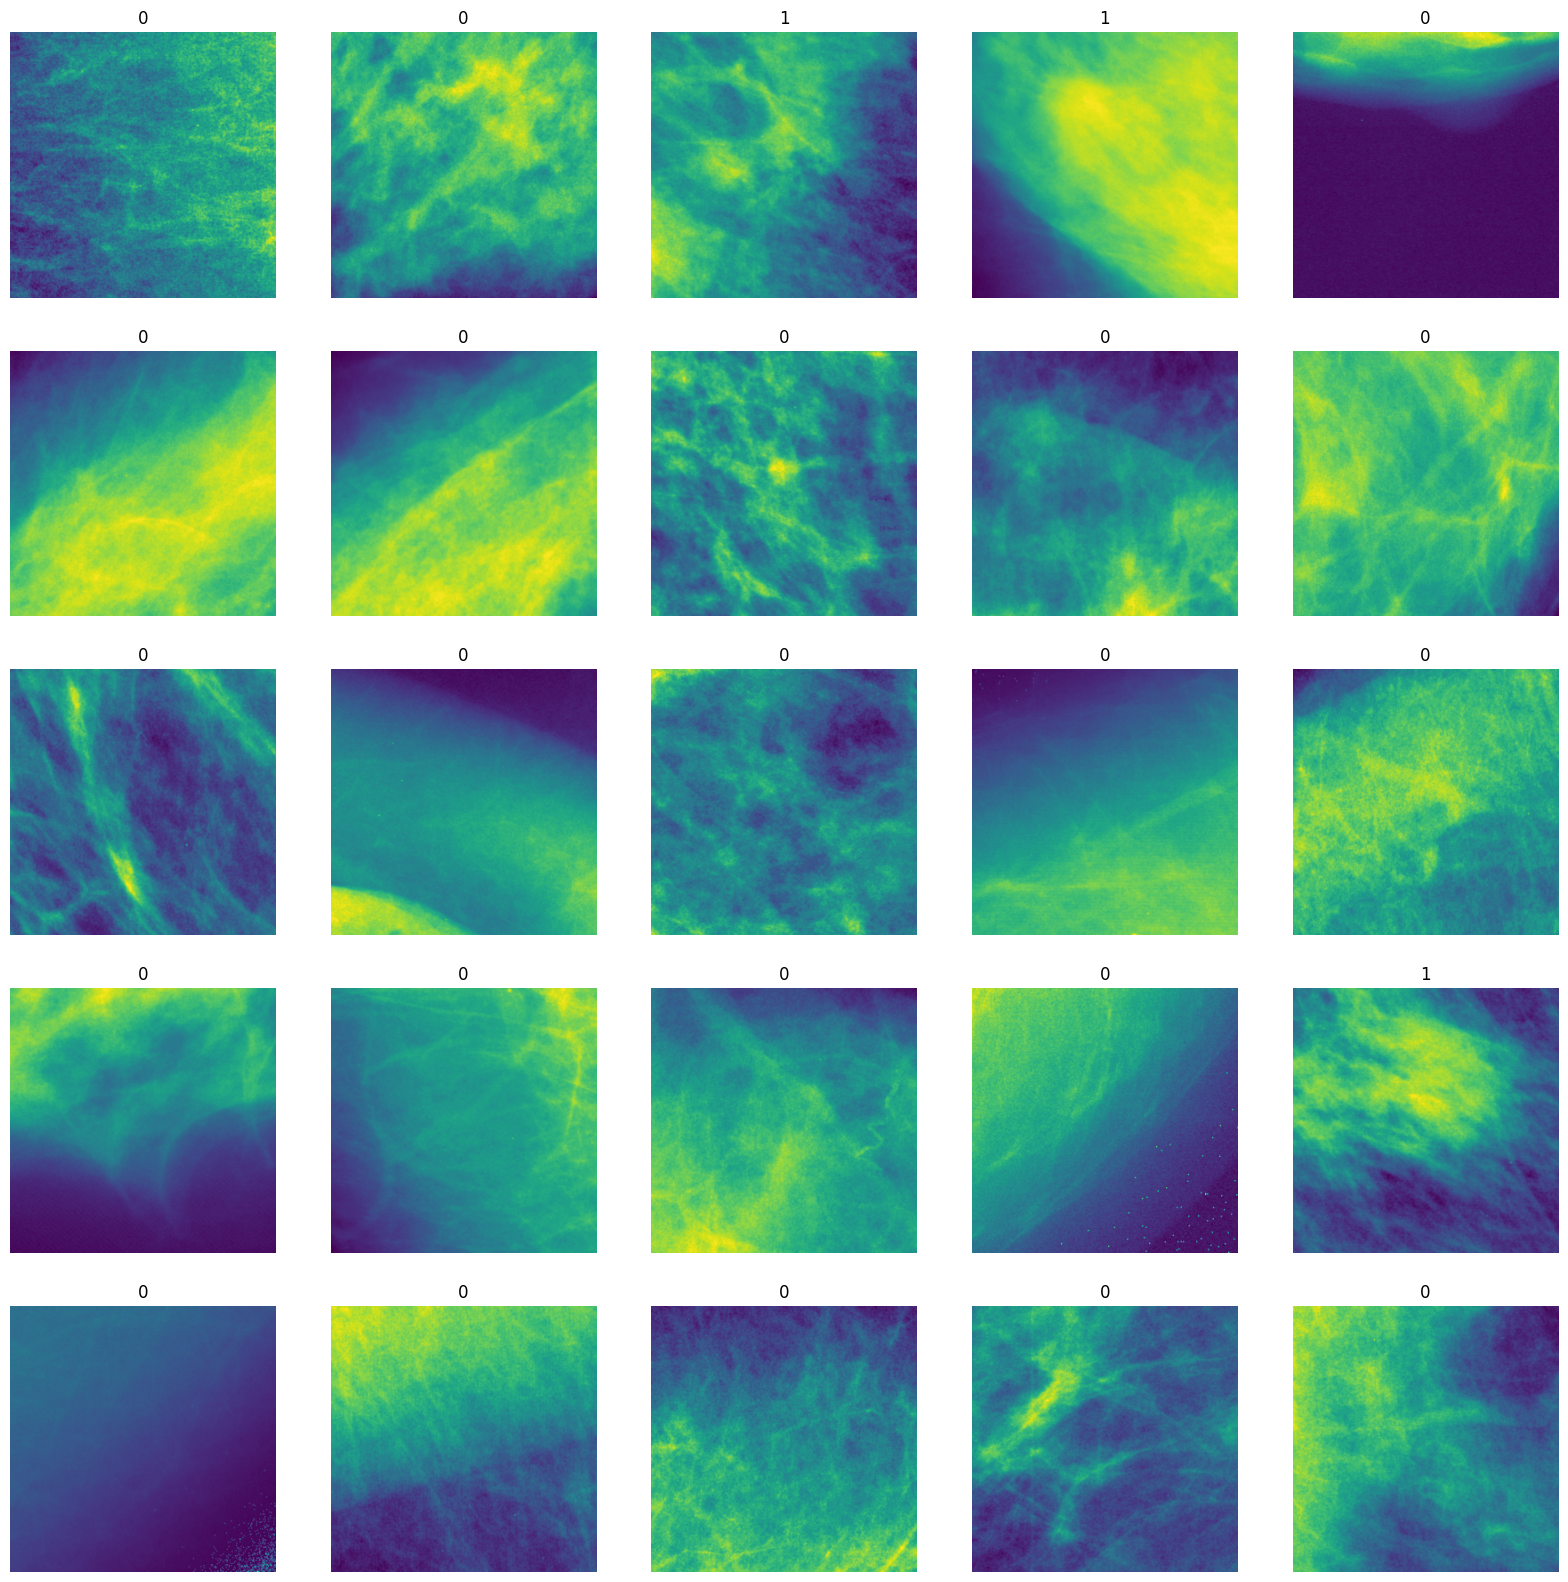

In [13]:
nrows = 5
ncols = 5

plt.figure(figsize=(20, 20))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(cv_data["data"][i], )
    plt.title(str(cv_data["label"][i]))
    # Remove the axis
    plt.axis('off')

plt.show()

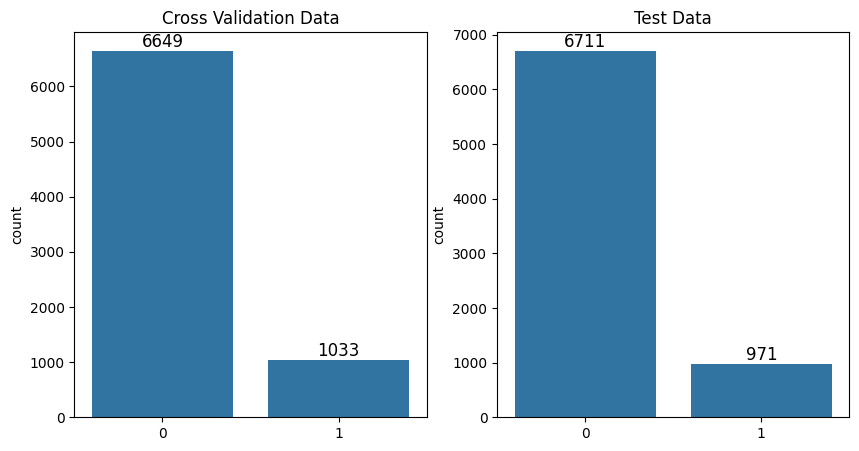

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=cv_data['label'])
plt.title("Cross Validation Data")
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),  # type: ignore
            fontsize=12, ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.title("Test Data")
ax2 = sns.countplot(x=test_data['label'])
for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),  # type: ignore
            fontsize=12, ha='center', va='bottom')

plt.show()

In [15]:
len(training_data['data'])

63174

In [16]:


train_dataset = create_tf_dataset(training_data, 32) # DatasetV2


In [17]:
cv_dataset = create_tf_dataset( cv_data, 32) # DatasetV2

# Testing Googles Model 
### Inception V1

In [17]:
# google 
def inception_module(x, filters):
    branch1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    branch3x3 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    branch3x3 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    branch5x5 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(branch_pool)

    # Concatenate all the branches
    output = layers.concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

def create_googlenet_v1():
    input_layer = layers.Input(shape=(299, 299, 1))

    # Initial Convolution and MaxPooling layers
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = inception_module(x, [64, 96, 128, 16, 32, 32])  # Inception module 1
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, [128, 128, 192, 32, 96, 64]) # Inception module 2
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, [192, 96, 208, 16, 48, 64])  # Inception module 3
    
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(1, activation='sigmoid')(x)  # Use sigmoid activation for binary classification

    model = models.Model(inputs=input_layer, outputs=x)
    return model


In [20]:
model_g = create_googlenet_v1()
model_g.summary()

model_g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(name='recall'), Precision(name='precision')])
best_val_recall_checkpoint = ModelCheckpoint('./v1_best_val_recall_checkpoint.keras', monitor='val_recall', save_best_only=True)
best_val_loss_checkpoint = ModelCheckpoint('./v1_best_val_loss_checkpoint.keras', monitor='val_loss', save_best_only=True)
history_g = model_g.fit(train_dataset, validation_data=cv_dataset, epochs=50, callbacks=[best_val_recall_checkpoint, best_val_loss_checkpoint])
model_g.save('model_g.keras')

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 150, 150,  │      3,200 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 75, 75,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 75,    │        256 │ max_pooling2d_6[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 75, 75,    │      6,240 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 75, 75,    │      1,040 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 75, 75,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 75, 75,    │      4,160 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 75, 75,    │    110,720 │ conv2d_21[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 75, 75,    │     12,832 │ conv2d_23[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 75, 75,    │      2,080 │ max_pooling2d_7[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 75, 75,    │          0 │ conv2d_20[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_22[0][0],  │
│                     │                   │            │ conv2d_24[0][0],  │
│                     │                   │            │ conv2d_25[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 38, 38,    │          0 │ concatenate_3[0]… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 38, 38,    │     32,896 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 38, 38,    │      8,224 │ max_pooling2d_8[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 38, 38,    │          0 │ max_pooling2d_8[… │
│ (MaxPooling2D)      │ 256)              │            │                 

 Total params: 905,953 (3.46 MB)

 Trainable params: 905,825 (3.46 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50


2024-05-10 17:08:34.573159: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[128,128,75,75]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,96,75,75]{3,2,1,0}, f32[128,96,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-05-10 17:08:34.574435: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.00145097s
Trying algorithm eng0{} for conv (f32[128,128,75,75]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,96,75,75]{3,2,1,0}, f32[128,96,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","

    494/Unknown 201s 311ms/step - accuracy: 0.8666 - loss: 0.3368 - precision: 0.4739 - recall: 0.1337

2024-05-10 17:11:39.333938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:11:39.333996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:11:39.334010: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:11:39.334037: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, trac

494/494 ━━━━━━━━━━━━━━━━━━━━ 215s 339ms/step - accuracy: 0.8666 - loss: 0.3367 - precision: 0.4747 - recall: 0.1345 - val_accuracy: 0.1347 - val_loss: 8.3748 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 2/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.8420 - loss: 0.4975 - precision: 0.3536 - recall: 0.1338

2024-05-10 17:14:03.000494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:14:03.000596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:14:07.644258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:14:07.644318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:14:07.644353: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:14:07.644386: I tensorflow/core/framework/local_re

494/494 ━━━━━━━━━━━━━━━━━━━━ 135s 272ms/step - accuracy: 0.8420 - loss: 0.4971 - precision: 0.3547 - recall: 0.1346 - val_accuracy: 0.4048 - val_loss: 2.1419 - val_precision: 0.1783 - val_recall: 0.9497
Epoch 3/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.8390 - loss: 0.4602 - precision: 0.3437 - recall: 0.1313

2024-05-10 17:16:17.809691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:16:17.809792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 134s 271ms/step - accuracy: 0.8391 - loss: 0.4599 - precision: 0.3448 - recall: 0.1321 - val_accuracy: 0.1345 - val_loss: 5.0575 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 4/50


2024-05-10 17:16:22.192152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:16:22.192235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:16:22.192292: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:16:22.192334: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8430 - loss: 0.4426 - precision: 0.3730 - recall: 0.1336

2024-05-10 17:18:31.700553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:18:31.700624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 134s 270ms/step - accuracy: 0.8431 - loss: 0.4423 - precision: 0.3740 - recall: 0.1344 - val_accuracy: 0.1345 - val_loss: 6.6275 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 5/50


2024-05-10 17:18:36.071850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:18:36.071914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:18:36.071929: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:18:36.071961: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8355 - loss: 0.5277 - precision: 0.3635 - recall: 0.1505

2024-05-10 17:20:44.270653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:20:44.270725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 133s 268ms/step - accuracy: 0.8356 - loss: 0.5273 - precision: 0.3645 - recall: 0.1513 - val_accuracy: 0.1402 - val_loss: 9.7965 - val_precision: 0.1352 - val_recall: 1.0000
Epoch 6/50


2024-05-10 17:20:48.644819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:20:48.644878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:20:48.644893: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:20:48.644923: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8484 - loss: 0.4780 - precision: 0.4447 - recall: 0.1585

2024-05-10 17:22:56.230395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:22:56.230517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8485 - loss: 0.4776 - precision: 0.4456 - recall: 0.1593 - val_accuracy: 0.1345 - val_loss: 5.8020 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 7/50


2024-05-10 17:23:00.763954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:23:00.764041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:23:00.764057: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:23:00.764091: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8542 - loss: 0.4625 - precision: 0.5221 - recall: 0.1815

2024-05-10 17:25:08.280658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:25:08.280735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8543 - loss: 0.4621 - precision: 0.5229 - recall: 0.1823 - val_accuracy: 0.1345 - val_loss: 6.0515 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 8/50


2024-05-10 17:25:12.677185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:25:12.677244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:25:12.677260: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:25:12.677292: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8543 - loss: 0.5089 - precision: 0.5167 - recall: 0.2102

2024-05-10 17:27:20.057139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:27:20.057217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8544 - loss: 0.5085 - precision: 0.5174 - recall: 0.2110 - val_accuracy: 0.1345 - val_loss: 12.1702 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 9/50


2024-05-10 17:27:24.423405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:27:24.423473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:27:24.423488: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:27:24.423518: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8360 - loss: 0.5859 - precision: 0.3902 - recall: 0.1962

2024-05-10 17:29:31.384520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:29:31.384587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 131s 265ms/step - accuracy: 0.8361 - loss: 0.5853 - precision: 0.3911 - recall: 0.1970 - val_accuracy: 0.1345 - val_loss: 4.7365 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 10/50


2024-05-10 17:29:35.707789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:29:35.707880: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 17:29:35.707922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8480 - loss: 0.4239 - precision: 0.4450 - recall: 0.2046

2024-05-10 17:31:42.466475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:31:42.466550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 131s 265ms/step - accuracy: 0.8481 - loss: 0.4235 - precision: 0.4459 - recall: 0.2054 - val_accuracy: 0.1346 - val_loss: 8.0523 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 11/50


2024-05-10 17:31:47.018573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:31:47.018658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8526 - loss: 0.4486 - precision: 0.4747 - recall: 0.1891

2024-05-10 17:33:54.644954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:33:54.646259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 135s 273ms/step - accuracy: 0.8526 - loss: 0.4483 - precision: 0.4755 - recall: 0.1899 - val_accuracy: 0.1363 - val_loss: 4.6896 - val_precision: 0.1347 - val_recall: 1.0000
Epoch 12/50


2024-05-10 17:34:02.217205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:34:02.217327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8499 - loss: 0.4608 - precision: 0.4913 - recall: 0.2316

2024-05-10 17:36:10.382094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:36:10.382179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 133s 267ms/step - accuracy: 0.8499 - loss: 0.4604 - precision: 0.4921 - recall: 0.2323 - val_accuracy: 0.1407 - val_loss: 8.6253 - val_precision: 0.1353 - val_recall: 1.0000
Epoch 13/50


2024-05-10 17:36:14.995176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:36:14.995240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:36:14.995254: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:36:14.995287: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8395 - loss: 0.4961 - precision: 0.4389 - recall: 0.2221

2024-05-10 17:38:22.038421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:38:22.038511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 131s 265ms/step - accuracy: 0.8396 - loss: 0.4956 - precision: 0.4397 - recall: 0.2229 - val_accuracy: 0.1372 - val_loss: 5.7085 - val_precision: 0.1348 - val_recall: 1.0000
Epoch 14/50


2024-05-10 17:38:26.354522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:38:26.354582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:38:26.354597: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:38:26.354631: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8289 - loss: 0.5050 - precision: 0.3805 - recall: 0.1867

2024-05-10 17:40:33.521177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:40:33.521301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8290 - loss: 0.5046 - precision: 0.3815 - recall: 0.1875 - val_accuracy: 0.1553 - val_loss: 3.7559 - val_precision: 0.1371 - val_recall: 0.9981
Epoch 15/50


2024-05-10 17:40:37.915097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:40:37.915155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:40:37.915169: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:40:37.915202: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8400 - loss: 0.4887 - precision: 0.4544 - recall: 0.2469

2024-05-10 17:42:44.907354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:42:44.907431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 131s 265ms/step - accuracy: 0.8401 - loss: 0.4882 - precision: 0.4552 - recall: 0.2477 - val_accuracy: 0.1462 - val_loss: 5.7320 - val_precision: 0.1360 - val_recall: 0.9990
Epoch 16/50


2024-05-10 17:42:49.212620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:42:49.212710: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8321 - loss: 0.4977 - precision: 0.4182 - recall: 0.1984

2024-05-10 17:44:56.210744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:44:56.210836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 131s 265ms/step - accuracy: 0.8322 - loss: 0.4973 - precision: 0.4191 - recall: 0.1991 - val_accuracy: 0.1446 - val_loss: 5.6723 - val_precision: 0.1357 - val_recall: 0.9981
Epoch 17/50


2024-05-10 17:45:00.594925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:45:00.595007: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 17:45:00.595041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8416 - loss: 0.4470 - precision: 0.4709 - recall: 0.2220

2024-05-10 17:47:07.892444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:47:07.892537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8417 - loss: 0.4466 - precision: 0.4717 - recall: 0.2228 - val_accuracy: 0.1369 - val_loss: 7.1735 - val_precision: 0.1347 - val_recall: 0.9990
Epoch 18/50


2024-05-10 17:47:12.237163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:47:12.237246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8364 - loss: 0.4879 - precision: 0.3802 - recall: 0.1827

2024-05-10 17:49:19.578192: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:49:19.578253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8365 - loss: 0.4875 - precision: 0.3812 - recall: 0.1835 - val_accuracy: 0.1535 - val_loss: 7.4138 - val_precision: 0.1369 - val_recall: 0.9981
Epoch 19/50


2024-05-10 17:49:23.984583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:49:23.984662: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 17:49:23.984698: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8430 - loss: 0.5538 - precision: 0.4576 - recall: 0.2042

2024-05-10 17:51:31.667387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:51:31.667498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8431 - loss: 0.5533 - precision: 0.4585 - recall: 0.2049 - val_accuracy: 0.1345 - val_loss: 7.6086 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 20/50


2024-05-10 17:51:36.012095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:51:36.012154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:51:36.012168: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:51:36.012199: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8273 - loss: 0.5898 - precision: 0.4270 - recall: 0.2639

2024-05-10 17:53:43.488545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:53:43.488595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8274 - loss: 0.5892 - precision: 0.4279 - recall: 0.2645 - val_accuracy: 0.1395 - val_loss: 8.4748 - val_precision: 0.1352 - val_recall: 1.0000
Epoch 21/50


2024-05-10 17:53:48.116283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:53:48.116340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 17:53:48.116354: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 17:53:48.116386: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8386 - loss: 0.5519 - precision: 0.4628 - recall: 0.2951

2024-05-10 17:55:55.529358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:55:55.529416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8387 - loss: 0.5514 - precision: 0.4636 - recall: 0.2958 - val_accuracy: 0.1438 - val_loss: 6.0835 - val_precision: 0.1357 - val_recall: 1.0000
Epoch 22/50


2024-05-10 17:55:59.963581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:55:59.963662: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 17:55:59.963698: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8328 - loss: 0.5288 - precision: 0.4513 - recall: 0.2959

2024-05-10 17:58:07.797499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:58:07.797634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 133s 268ms/step - accuracy: 0.8329 - loss: 0.5283 - precision: 0.4521 - recall: 0.2966 - val_accuracy: 0.1446 - val_loss: 6.5988 - val_precision: 0.1358 - val_recall: 1.0000
Epoch 23/50


2024-05-10 17:58:12.575685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 17:58:12.575779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8621 - loss: 0.3975 - precision: 0.5504 - recall: 0.2936

2024-05-10 18:00:20.533435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:00:20.533533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 133s 267ms/step - accuracy: 0.8621 - loss: 0.3973 - precision: 0.5510 - recall: 0.2943 - val_accuracy: 0.1502 - val_loss: 3.6474 - val_precision: 0.1366 - val_recall: 1.0000
Epoch 24/50


2024-05-10 18:00:25.086490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:00:25.086557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8388 - loss: 0.5241 - precision: 0.4872 - recall: 0.3770

2024-05-10 18:02:32.699711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:02:32.699760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:02:32.699775: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:02:32.699808: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8389 - loss: 0.5237 - precision: 0.4879 - recall: 0.3775 - val_accuracy: 0.1345 - val_loss: 12.5137 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 25/50


2024-05-10 18:02:37.198480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:02:37.198563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8193 - loss: 0.8677 - precision: 0.4275 - recall: 0.3213

2024-05-10 18:04:45.044828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:04:45.044980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8194 - loss: 0.8666 - precision: 0.4283 - recall: 0.3219 - val_accuracy: 0.1427 - val_loss: 16.9486 - val_precision: 0.1356 - val_recall: 1.0000
Epoch 26/50


2024-05-10 18:04:49.423669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:04:49.423759: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 18:04:49.423805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8497 - loss: 0.7113 - precision: 0.5028 - recall: 0.3494

2024-05-10 18:06:56.854349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:06:56.854720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8497 - loss: 0.7105 - precision: 0.5035 - recall: 0.3500 - val_accuracy: 0.1444 - val_loss: 9.6397 - val_precision: 0.1357 - val_recall: 0.9990
Epoch 27/50


2024-05-10 18:07:01.415346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:07:01.415426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8214 - loss: 0.5360 - precision: 0.3821 - recall: 0.2318

2024-05-10 18:09:08.771008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:09:08.771093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8215 - loss: 0.5355 - precision: 0.3830 - recall: 0.2325 - val_accuracy: 0.1371 - val_loss: 8.2969 - val_precision: 0.1348 - val_recall: 1.0000
Epoch 28/50


2024-05-10 18:09:13.154596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:09:13.154696: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 18:09:13.154738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8292 - loss: 0.6467 - precision: 0.4580 - recall: 0.4028

2024-05-10 18:11:20.584402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:11:20.584491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8293 - loss: 0.6460 - precision: 0.4587 - recall: 0.4033 - val_accuracy: 0.1345 - val_loss: 34.6305 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 29/50


2024-05-10 18:11:25.009923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:11:25.010008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:11:25.010027: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:11:25.010062: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8017 - loss: 1.3405 - precision: 0.3648 - recall: 0.3128

2024-05-10 18:13:32.718807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:13:32.718933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8019 - loss: 1.3387 - precision: 0.3657 - recall: 0.3135 - val_accuracy: 0.1484 - val_loss: 5.6127 - val_precision: 0.1364 - val_recall: 1.0000
Epoch 30/50


2024-05-10 18:13:37.345487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:13:37.345569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:13:37.345605: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:13:37.345650: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.8315 - loss: 0.5234 - precision: 0.4598 - recall: 0.3936

2024-05-10 18:15:46.729884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:15:46.729993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 134s 270ms/step - accuracy: 0.8316 - loss: 0.5230 - precision: 0.4605 - recall: 0.3942 - val_accuracy: 0.1345 - val_loss: 11.1371 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 31/50


2024-05-10 18:15:51.512171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:15:51.512307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:15:51.512330: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:15:51.512368: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8211 - loss: 0.6493 - precision: 0.4424 - recall: 0.4047

2024-05-10 18:17:59.312357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:17:59.312439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8212 - loss: 0.6486 - precision: 0.4431 - recall: 0.4052 - val_accuracy: 0.1530 - val_loss: 7.8572 - val_precision: 0.1370 - val_recall: 1.0000
Epoch 32/50


2024-05-10 18:18:03.697566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:18:03.697627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:18:03.697642: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:18:03.697676: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8532 - loss: 0.5227 - precision: 0.5100 - recall: 0.3722

2024-05-10 18:20:11.054466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:20:11.054639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8533 - loss: 0.5222 - precision: 0.5106 - recall: 0.3728 - val_accuracy: 0.1411 - val_loss: 15.6471 - val_precision: 0.1354 - val_recall: 1.0000
Epoch 33/50


2024-05-10 18:20:15.797872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:20:15.797960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:20:15.797976: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:20:15.798011: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8342 - loss: 0.6355 - precision: 0.4719 - recall: 0.4440

2024-05-10 18:22:24.064207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:22:24.064304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 133s 268ms/step - accuracy: 0.8343 - loss: 0.6348 - precision: 0.4726 - recall: 0.4444 - val_accuracy: 0.1517 - val_loss: 9.5722 - val_precision: 0.1368 - val_recall: 1.0000
Epoch 34/50


2024-05-10 18:22:28.561672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:22:28.561897: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 18:22:28.561943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8242 - loss: 0.6826 - precision: 0.4314 - recall: 0.3560

2024-05-10 18:24:35.867020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:24:35.867223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8243 - loss: 0.6818 - precision: 0.4321 - recall: 0.3566 - val_accuracy: 0.1351 - val_loss: 12.0135 - val_precision: 0.1345 - val_recall: 0.9990
Epoch 35/50


2024-05-10 18:24:40.603473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:24:40.603579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:24:40.603596: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:24:40.603627: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8003 - loss: 0.6093 - precision: 0.3470 - recall: 0.2923

2024-05-10 18:26:48.275022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:26:48.275153: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8004 - loss: 0.6087 - precision: 0.3479 - recall: 0.2930 - val_accuracy: 0.1343 - val_loss: 15.3512 - val_precision: 0.1344 - val_recall: 0.9990
Epoch 36/50


2024-05-10 18:26:52.727752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:26:52.727865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-10 18:26:52.727902: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8445 - loss: 0.7094 - precision: 0.4903 - recall: 0.4153

2024-05-10 18:29:00.308812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:29:00.308876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:29:00.308893: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:29:00.308931: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8445 - loss: 0.7086 - precision: 0.4910 - recall: 0.4158 - val_accuracy: 0.1395 - val_loss: 16.8203 - val_precision: 0.1351 - val_recall: 0.9990
Epoch 37/50


2024-05-10 18:29:05.070156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:29:05.070234: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 18:29:05.070269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8528 - loss: 0.6076 - precision: 0.5121 - recall: 0.3635

2024-05-10 18:31:12.439330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:31:12.439459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8528 - loss: 0.6070 - precision: 0.5128 - recall: 0.3641 - val_accuracy: 0.1343 - val_loss: 8.3123 - val_precision: 0.1344 - val_recall: 0.9990
Epoch 38/50


2024-05-10 18:31:16.924225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:31:16.924311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8211 - loss: 0.6191 - precision: 0.4516 - recall: 0.4130

2024-05-10 18:33:24.088169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:33:24.088258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8212 - loss: 0.6185 - precision: 0.4523 - recall: 0.4136 - val_accuracy: 0.1532 - val_loss: 13.2337 - val_precision: 0.1369 - val_recall: 0.9990
Epoch 39/50


2024-05-10 18:33:28.517022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:33:28.517081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:33:28.517095: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:33:28.517126: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8127 - loss: 0.8337 - precision: 0.4233 - recall: 0.4082

2024-05-10 18:35:36.201082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:35:36.201186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8128 - loss: 0.8327 - precision: 0.4240 - recall: 0.4087 - val_accuracy: 0.1639 - val_loss: 4.7980 - val_precision: 0.1384 - val_recall: 0.9990
Epoch 40/50


2024-05-10 18:35:40.613306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:35:40.613381: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 18:35:40.613420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8187 - loss: 0.4975 - precision: 0.4311 - recall: 0.4083

2024-05-10 18:37:48.497028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:37:48.497135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 133s 268ms/step - accuracy: 0.8189 - loss: 0.4971 - precision: 0.4318 - recall: 0.4088 - val_accuracy: 0.1513 - val_loss: 6.5749 - val_precision: 0.1367 - val_recall: 0.9990
Epoch 41/50


2024-05-10 18:37:53.612229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:37:53.612295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:37:53.612310: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:37:53.612342: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8257 - loss: 0.5945 - precision: 0.4609 - recall: 0.4602

2024-05-10 18:40:01.422627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:40:01.422716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8258 - loss: 0.5939 - precision: 0.4616 - recall: 0.4607 - val_accuracy: 0.1345 - val_loss: 22.7909 - val_precision: 0.1344 - val_recall: 0.9990
Epoch 42/50


2024-05-10 18:40:05.984012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:40:05.984078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:40:05.984093: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:40:05.984126: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8140 - loss: 0.9362 - precision: 0.4363 - recall: 0.4346

2024-05-10 18:42:13.149929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:42:13.150053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8141 - loss: 0.9350 - precision: 0.4370 - recall: 0.4352 - val_accuracy: 0.1605 - val_loss: 9.3539 - val_precision: 0.1380 - val_recall: 0.9990
Epoch 43/50


2024-05-10 18:42:17.813820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:42:17.813970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8094 - loss: 0.6848 - precision: 0.4201 - recall: 0.4272

2024-05-10 18:44:25.702941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:44:25.703033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8096 - loss: 0.6841 - precision: 0.4208 - recall: 0.4277 - val_accuracy: 0.1558 - val_loss: 10.0385 - val_precision: 0.1373 - val_recall: 0.9990
Epoch 44/50


2024-05-10 18:44:30.283833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:44:30.283896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:44:30.283912: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:44:30.283944: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8405 - loss: 0.6251 - precision: 0.4857 - recall: 0.4055

2024-05-10 18:46:37.899794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:46:37.899851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8406 - loss: 0.6245 - precision: 0.4864 - recall: 0.4061 - val_accuracy: 0.1703 - val_loss: 14.7863 - val_precision: 0.1394 - val_recall: 0.9990
Epoch 45/50


2024-05-10 18:46:42.779780: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:46:42.779879: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894
2024-05-10 18:46:42.779924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8275 - loss: 1.0708 - precision: 0.4623 - recall: 0.4231

2024-05-10 18:48:50.074520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:48:50.074629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8276 - loss: 1.0694 - precision: 0.4630 - recall: 0.4237 - val_accuracy: 0.1496 - val_loss: 12.3595 - val_precision: 0.1365 - val_recall: 1.0000
Epoch 46/50


2024-05-10 18:48:54.723016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:48:54.723063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:48:54.723107: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:48:54.723143: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8429 - loss: 0.6599 - precision: 0.5039 - recall: 0.4190

2024-05-10 18:51:02.409201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:51:02.409252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:51:02.409267: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:51:02.409300: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 267ms/step - accuracy: 0.8430 - loss: 0.6592 - precision: 0.5046 - recall: 0.4195 - val_accuracy: 0.1841 - val_loss: 4.9966 - val_precision: 0.1414 - val_recall: 0.9990
Epoch 47/50


2024-05-10 18:51:07.130069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:51:07.130161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8156 - loss: 0.5826 - precision: 0.4366 - recall: 0.4021

2024-05-10 18:53:14.765560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:53:14.765651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 133s 267ms/step - accuracy: 0.8158 - loss: 0.5820 - precision: 0.4373 - recall: 0.4026 - val_accuracy: 0.1687 - val_loss: 9.5965 - val_precision: 0.1391 - val_recall: 0.9990
Epoch 48/50


2024-05-10 18:53:19.865377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:53:19.865442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:53:19.865458: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:53:19.865491: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8174 - loss: 0.6634 - precision: 0.4386 - recall: 0.4209

2024-05-10 18:55:27.301838: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:55:27.301973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8176 - loss: 0.6626 - precision: 0.4394 - recall: 0.4214 - val_accuracy: 0.1688 - val_loss: 6.9497 - val_precision: 0.1392 - val_recall: 0.9990
Epoch 49/50


2024-05-10 18:55:31.904456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:55:31.904520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:55:31.904533: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:55:31.904565: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8406 - loss: 0.4942 - precision: 0.4894 - recall: 0.4479

2024-05-10 18:57:39.104393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:57:39.104558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8407 - loss: 0.4938 - precision: 0.4901 - recall: 0.4484 - val_accuracy: 0.1947 - val_loss: 6.0682 - val_precision: 0.1430 - val_recall: 0.9990
Epoch 50/50


2024-05-10 18:57:43.576513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:57:43.576616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:57:43.576638: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:57:43.576676: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8302 - loss: 0.5335 - precision: 0.4752 - recall: 0.4654

2024-05-10 18:59:50.709091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:59:50.709167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


494/494 ━━━━━━━━━━━━━━━━━━━━ 132s 266ms/step - accuracy: 0.8303 - loss: 0.5330 - precision: 0.4759 - recall: 0.4659 - val_accuracy: 0.1757 - val_loss: 8.4814 - val_precision: 0.1402 - val_recall: 0.9990


2024-05-10 18:59:55.573566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-10 18:59:55.573628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-10 18:59:55.573642: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825427425057317037
2024-05-10 18:59:55.573672: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3754358721622704894


In [18]:
from typing import List, Tuple, TypedDict, Dict

def plot_histories(histories:List[ Dict[str, List[int]]], log_scale=False):
    '''Plot the training and validation loss and accuracy of the models in the histories list
    histories: List of histories dictionaries
    '''
    plt.figure(figsize=(10, 15))
    
    history_dictionary : Dict[str, List[int] ]  = {}
    # make a whole array from the elements of the dictionary 
    for history in histories:
        for plt_name, values in history.items():
            if plt_name not in history_dictionary:
                history_dictionary[plt_name] = []
            history_dictionary[plt_name].extend(values) 
   
    
    plt.subplot(len(history_dictionary)//2,1,1)
    plt.title('Loss')
    plt.plot(history_dictionary['loss'], label='Training Loss')
    plt.plot(history_dictionary['val_loss'], label='Validation Loss')
    if log_scale:
        plt.yscale("log")
    plt.legend()

    plt.subplot(len(history_dictionary)//2,1,2)
    plt.title('Accuracy')
    plt.plot(history_dictionary['accuracy'], label='Training Accuracy')
    plt.plot(history_dictionary['val_accuracy'], label='Validation Accuracy')
    if log_scale:
        plt.yscale("log")
    plt.legend()

    plt.subplot(len(history_dictionary)//2,1,3)
    plt.title("Recall")
    plt.plot(history_dictionary['recall'], label='Training Recall')
    plt.plot(history_dictionary['val_recall'], label='Validation Recall')
    if log_scale:
        plt.yscale("log")
    plt.legend()

    if "precision" in history_dictionary:
        plt.subplot(len(history_dictionary)//2,1,4)
        plt.title("precision")
        plt.plot(history_dictionary['precision'], label='Training precision')
        plt.plot(history_dictionary['val_precision'], label='Validation precision')
        if log_scale:
            plt.yscale("log")
        plt.legend()


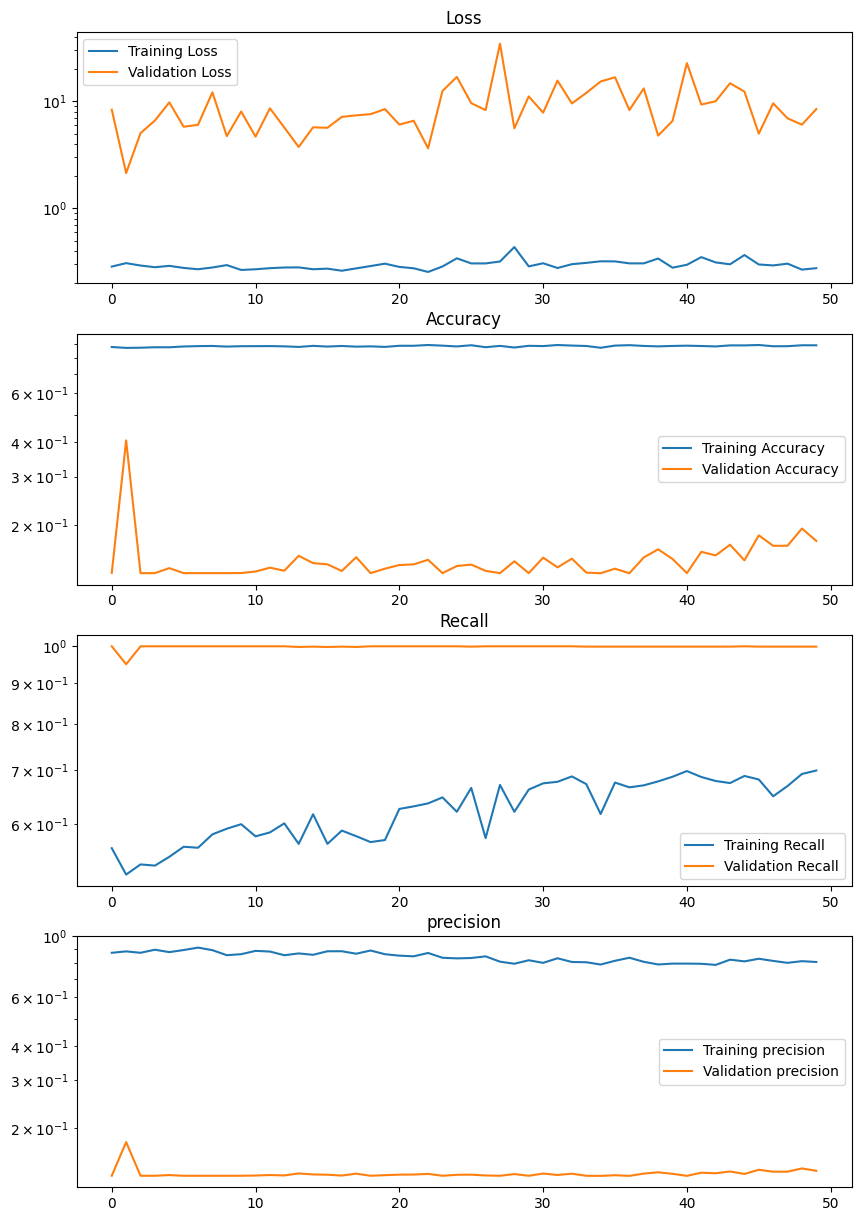

In [23]:
plot_histories([history_g.history], log_scale=True)

In [ ]:
# Print all the history data 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.max_rows', None)  # None means unlimited

pd.DataFrame(history_g.history)

### Inception V2/3/Dropout

In [19]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Dropout, Dense, Flatten, BatchNormalization, Activation, AveragePooling2D, Add, MaxPool2D, GlobalAveragePooling2D
from keras.models import Model
import tensorflow as tf

def inception_module_v3(x, filters, dropout_rate=0.2):
    # 1x1 convolution
    conv1x1 = Conv2D(filters['1x1'], (1, 1), padding='same')(x)
    conv1x1 = BatchNormalization()(conv1x1)
    conv1x1 = Activation('relu')(conv1x1)

    # Factored 5x5 convolution as two 3x3 convolutions
    conv5x5 = Conv2D(filters['5x5_reduce'], (1, 1), padding='same')(x)
    conv5x5 = BatchNormalization()(conv5x5)
    conv5x5 = Activation('relu')(conv5x5)
    conv5x5 = Conv2D(filters['5x5'], (3, 3), padding='same')(conv5x5)
    conv5x5 = BatchNormalization()(conv5x5)
    conv5x5 = Activation('relu')(conv5x5)
    conv5x5 = Conv2D(filters['5x5'], (3, 3), padding='same')(conv5x5)
    conv5x5 = BatchNormalization()(conv5x5)
    conv5x5 = Activation('relu')(conv5x5)
    conv5x5 = Dropout(dropout_rate)(conv5x5)  # Dropout added

    # 3x3 convolution
    conv3x3 = Conv2D(filters['3x3_reduce'], (1, 1), padding='same')(x)
    conv3x3 = BatchNormalization()(conv3x3)
    conv3x3 = Activation('relu')(conv3x3)
    conv3x3 = Conv2D(filters['3x3'], (3, 3), padding='same')(conv3x3)
    conv3x3 = BatchNormalization()(conv3x3)
    conv3x3 = Activation('relu')(conv3x3)
    conv3x3 = Dropout(dropout_rate)(conv3x3)  # Dropout added

    # MaxPooling with 1x1 convolution projection
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters['pool_proj'], (1, 1), padding='same')(pool_proj)
    pool_proj = BatchNormalization()(pool_proj)
    pool_proj = Activation('relu')(pool_proj)
    pool_proj = Dropout(dropout_rate)(pool_proj)  # Dropout added

    # Concatenate all the convolutions
    output = concatenate([conv1x1, conv5x5, conv3x3, pool_proj], axis=-1)
    # output = Dropout(dropout_rate)(output)  # Dropout added after concatenation
    return output

def create_googlenet_v2() ->Model:
    input_layer = Input(shape=(299, 299, 1))
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)

    # Adjusted filter sizes for complexity reduction
    x = inception_module_v3(x, filters={'1x1': 32, '5x5_reduce': 8, '5x5': 24, '3x3_reduce': 32, '3x3': 48, 'pool_proj': 16} )
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module_v3(x, filters={'1x1': 64, '5x5_reduce': 16, '5x5': 48, '3x3_reduce': 64, '3x3': 96, 'pool_proj': 32})
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module_v3(x, filters={'1x1': 64, '5x5_reduce': 16, '5x5': 48, '3x3_reduce': 64, '3x3': 96, 'pool_proj': 32})
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module_v3(x, filters={'1x1': 64, '5x5_reduce': 16, '5x5': 48, '3x3_reduce': 64, '3x3': 96, 'pool_proj': 32})

    x = AveragePooling2D((3, 3), strides=(1, 1))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(1, activation='sigmoid')(x)  # Use sigmoid activation for binary classification

    model = Model(inputs=input_layer, outputs=x)
    return model


In [21]:
# Find the weights for each class  
ones = 0 
zeros = 0 
for label in training_data['label']:
	if label == 1:
		ones += 1
	else:
		zeros += 1

total = ones + zeros

weights_dict = {0: (1/zeros) * (total/2), 1: (1/ones) * (total/2)}
weights_dict
# {0: 0.6499917688698658, 1: 2.1667581286870625}

{0: 0.6499917688698658, 1: 2.1667581286870625}

In [20]:
model_g_custom = create_googlenet_v2()
best_val_recall_checkpoint = ModelCheckpoint('./v2_best_val_recall_checkpoint.keras', monitor='val_recall', save_best_only=True)
best_val_loss_checkpoint = ModelCheckpoint('./v2_best_val_loss_checkpoint.keras', monitor='val_loss', save_best_only=True)
model_g_custom.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(name='recall'), Precision(name='precision')])
model_g_history = model_g_custom.fit(train_dataset, 
                                     validation_data=cv_dataset, 
                                     epochs=40, 
                                     callbacks=[best_val_recall_checkpoint, best_val_loss_checkpoint], 
                                    #  class_weight=weights_dict
                                     )
model_g_custom.save('model_g_custom.keras')


Epoch 1/40


I0000 00:00:1715401207.154186  283527 service.cc:145] XLA service 0x7f33280194a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715401207.154360  283527 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-05-11 04:20:07.652882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-11 04:20:09.750058: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1715401250.371970  283527 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


   1975/Unknown 203s 72ms/step - accuracy: 0.8756 - loss: 0.2809 - precision: 0.5609 - recall: 0.2644

2024-05-11 04:23:12.878649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:23:12.879141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-11 04:23:22.176102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:23:22.176436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is abortin

1975/1975 ━━━━━━━━━━━━━━━━━━━━ 213s 77ms/step - accuracy: 0.8756 - loss: 0.2808 - precision: 0.5611 - recall: 0.2646 - val_accuracy: 0.1345 - val_loss: 3.4350 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 2/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8762 - loss: 0.3303 - precision: 0.5875 - recall: 0.4111

2024-05-11 04:25:06.366201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:25:06.366644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 107s 54ms/step - accuracy: 0.8763 - loss: 0.3302 - precision: 0.5878 - recall: 0.4114 - val_accuracy: 0.1345 - val_loss: 3.4438 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 3/40


2024-05-11 04:25:09.845225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:25:09.845300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8890 - loss: 0.3137 - precision: 0.6426 - recall: 0.4824

2024-05-11 04:26:54.253757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:26:54.253814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:26:57.538621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:26:57.538722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.8890 - loss: 0.3137 - precision: 0.6427 - recall: 0.4825 - val_accuracy: 0.1345 - val_loss: 2.8368 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 4/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8919 - loss: 0.3013 - precision: 0.6540 - recall: 0.4875

2024-05-11 04:28:41.528636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:28:41.529241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 107s 54ms/step - accuracy: 0.8919 - loss: 0.3012 - precision: 0.6542 - recall: 0.4878 - val_accuracy: 0.1345 - val_loss: 4.7529 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 5/40


2024-05-11 04:28:45.099854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:28:45.099954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8965 - loss: 0.2910 - precision: 0.6687 - recall: 0.5196

2024-05-11 04:30:29.515625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:30:29.515689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.8965 - loss: 0.2909 - precision: 0.6689 - recall: 0.5199 - val_accuracy: 0.1345 - val_loss: 4.9320 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 6/40


2024-05-11 04:30:32.870301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:30:32.871005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8951 - loss: 0.3009 - precision: 0.6617 - recall: 0.5575

2024-05-11 04:32:23.975191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:32:23.975264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:32:23.975292: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 04:32:23.975332: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 115s 58ms/step - accuracy: 0.8951 - loss: 0.3008 - precision: 0.6620 - recall: 0.5577 - val_accuracy: 0.1345 - val_loss: 4.2409 - val_precision: 0.1345 - val_recall: 1.0000
Epoch 7/40


2024-05-11 04:32:27.405380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:32:27.405646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9072 - loss: 0.2907 - precision: 0.6994 - recall: 0.6103

2024-05-11 04:34:12.085848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:34:12.086475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 55ms/step - accuracy: 0.9072 - loss: 0.2906 - precision: 0.6996 - recall: 0.6105 - val_accuracy: 0.1558 - val_loss: 3.4925 - val_precision: 0.1374 - val_recall: 1.0000
Epoch 8/40


2024-05-11 04:34:15.466839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:34:15.466913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9132 - loss: 0.2646 - precision: 0.7208 - recall: 0.6561

2024-05-11 04:35:59.509994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:35:59.510067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:35:59.510085: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 04:35:59.510094: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.9132 - loss: 0.2645 - precision: 0.7210 - recall: 0.6562 - val_accuracy: 0.1506 - val_loss: 3.8624 - val_precision: 0.1367 - val_recall: 1.0000
Epoch 9/40


2024-05-11 04:36:03.003369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:36:03.003423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:36:03.003436: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 04:36:03.003470: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9057 - loss: 0.2839 - precision: 0.6976 - recall: 0.6338

2024-05-11 04:37:50.437396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:37:50.437474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:37:54.327311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:37:54.327456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 112s 56ms/step - accuracy: 0.9057 - loss: 0.2838 - precision: 0.6978 - recall: 0.6339 - val_accuracy: 0.1735 - val_loss: 2.2224 - val_precision: 0.1399 - val_recall: 1.0000
Epoch 10/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9143 - loss: 0.2759 - precision: 0.7229 - recall: 0.6693

2024-05-11 04:39:38.863940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:39:38.864020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.9143 - loss: 0.2758 - precision: 0.7231 - recall: 0.6695 - val_accuracy: 0.1432 - val_loss: 2.4542 - val_precision: 0.1357 - val_recall: 1.0000
Epoch 11/40


2024-05-11 04:39:42.568982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:39:42.569315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9114 - loss: 0.2714 - precision: 0.7143 - recall: 0.6374

2024-05-11 04:41:28.195725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:41:28.196571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:41:31.608202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:41:31.608313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9114 - loss: 0.2714 - precision: 0.7144 - recall: 0.6375 - val_accuracy: 0.2068 - val_loss: 1.4240 - val_precision: 0.1450 - val_recall: 1.0000
Epoch 12/40
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9217 - loss: 0.2206 - precision: 0.7437 - recall: 0.7103

2024-05-11 04:43:14.816570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:43:14.817185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:43:18.120146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:43:18.120211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 107s 54ms/step - accuracy: 0.9217 - loss: 0.2206 - precision: 0.7438 - recall: 0.7104 - val_accuracy: 0.2960 - val_loss: 1.2066 - val_precision: 0.1604 - val_recall: 1.0000
Epoch 13/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9257 - loss: 0.2160 - precision: 0.7593 - recall: 0.7112

2024-05-11 04:45:00.935839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:45:00.935924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:45:04.873482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:45:04.873563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:45:04.873579: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 04:45:04.873620: I tensorflow/core/framework/local_ren

1975/1975 ━━━━━━━━━━━━━━━━━━━━ 107s 54ms/step - accuracy: 0.9257 - loss: 0.2159 - precision: 0.7594 - recall: 0.7113 - val_accuracy: 0.2925 - val_loss: 1.6286 - val_precision: 0.1596 - val_recall: 0.9990
Epoch 14/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9259 - loss: 0.2208 - precision: 0.7612 - recall: 0.7104

2024-05-11 04:46:53.646034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:46:53.646108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:46:53.646124: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 04:46:53.646166: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 04:46:57.142488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:46:57.142562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OU

1975/1975 ━━━━━━━━━━━━━━━━━━━━ 112s 57ms/step - accuracy: 0.9259 - loss: 0.2207 - precision: 0.7613 - recall: 0.7105 - val_accuracy: 0.6067 - val_loss: 0.9401 - val_precision: 0.2542 - val_recall: 0.9952
Epoch 15/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9303 - loss: 0.2074 - precision: 0.7739 - recall: 0.7324

2024-05-11 04:48:42.377870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:48:42.377953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 55ms/step - accuracy: 0.9303 - loss: 0.2073 - precision: 0.7740 - recall: 0.7325 - val_accuracy: 0.4811 - val_loss: 1.2588 - val_precision: 0.2053 - val_recall: 0.9961
Epoch 16/40


2024-05-11 04:48:45.915404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:48:45.915483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9309 - loss: 0.2062 - precision: 0.7735 - recall: 0.7475

2024-05-11 04:50:29.977572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:50:29.978198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.9309 - loss: 0.2061 - precision: 0.7736 - recall: 0.7476 - val_accuracy: 0.4641 - val_loss: 1.0833 - val_precision: 0.2002 - val_recall: 0.9971
Epoch 17/40


2024-05-11 04:50:33.703234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:50:33.703295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:50:33.703345: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 04:50:33.703393: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9325 - loss: 0.1960 - precision: 0.7783 - recall: 0.7535

2024-05-11 04:52:17.903395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:52:17.904051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:52:21.338753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:52:21.338831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 55ms/step - accuracy: 0.9325 - loss: 0.1959 - precision: 0.7784 - recall: 0.7536 - val_accuracy: 0.6528 - val_loss: 0.7280 - val_precision: 0.2784 - val_recall: 0.9932
Epoch 18/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9373 - loss: 0.1951 - precision: 0.7954 - recall: 0.7647

2024-05-11 04:54:05.657175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:54:05.657291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:54:09.060952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:54:09.061045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 107s 54ms/step - accuracy: 0.9373 - loss: 0.1951 - precision: 0.7955 - recall: 0.7648 - val_accuracy: 0.6983 - val_loss: 0.6846 - val_precision: 0.3078 - val_recall: 0.9961
Epoch 19/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9372 - loss: 0.1887 - precision: 0.7933 - recall: 0.7731

2024-05-11 04:55:53.516854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:55:53.517595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.9373 - loss: 0.1887 - precision: 0.7935 - recall: 0.7732 - val_accuracy: 0.6271 - val_loss: 0.8758 - val_precision: 0.2645 - val_recall: 0.9961
Epoch 20/40


2024-05-11 04:55:56.938091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:55:56.938278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9418 - loss: 0.1751 - precision: 0.8071 - recall: 0.7867

2024-05-11 04:57:39.591243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:57:39.591681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 04:57:42.924709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:57:42.924786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 107s 54ms/step - accuracy: 0.9418 - loss: 0.1750 - precision: 0.8072 - recall: 0.7868 - val_accuracy: 0.7800 - val_loss: 0.4747 - val_precision: 0.3766 - val_recall: 0.9710
Epoch 21/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9424 - loss: 0.1683 - precision: 0.8070 - recall: 0.7960

2024-05-11 04:59:26.103568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:59:26.103658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 106s 53ms/step - accuracy: 0.9424 - loss: 0.1682 - precision: 0.8071 - recall: 0.7961 - val_accuracy: 0.6238 - val_loss: 0.8146 - val_precision: 0.2630 - val_recall: 0.9971
Epoch 22/40


2024-05-11 04:59:29.435651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 04:59:29.435751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9402 - loss: 0.1815 - precision: 0.8018 - recall: 0.7926

2024-05-11 05:01:11.696969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:01:11.697079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 05:01:15.010998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:01:15.011198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 106s 53ms/step - accuracy: 0.9403 - loss: 0.1814 - precision: 0.8019 - recall: 0.7927 - val_accuracy: 0.8372 - val_loss: 0.3680 - val_precision: 0.4513 - val_recall: 0.9768
Epoch 23/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9470 - loss: 0.1522 - precision: 0.8233 - recall: 0.8101

2024-05-11 05:02:59.152366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:02:59.152473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 107s 54ms/step - accuracy: 0.9470 - loss: 0.1522 - precision: 0.8234 - recall: 0.8102 - val_accuracy: 0.7320 - val_loss: 0.8231 - val_precision: 0.3327 - val_recall: 0.9874
Epoch 24/40


2024-05-11 05:03:02.520611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:03:02.520675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 05:03:02.520690: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 05:03:02.520726: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9468 - loss: 0.1572 - precision: 0.8201 - recall: 0.8112

2024-05-11 05:04:46.490391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:04:46.490455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 05:04:49.996493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:04:49.996566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.9468 - loss: 0.1572 - precision: 0.8202 - recall: 0.8113 - val_accuracy: 0.8258 - val_loss: 0.4309 - val_precision: 0.4333 - val_recall: 0.9584
Epoch 25/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9476 - loss: 0.1494 - precision: 0.8195 - recall: 0.8243

2024-05-11 05:06:34.571093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:06:34.571677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.9477 - loss: 0.1493 - precision: 0.8197 - recall: 0.8244 - val_accuracy: 0.8305 - val_loss: 0.4470 - val_precision: 0.4404 - val_recall: 0.9613
Epoch 26/40


2024-05-11 05:06:37.886048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:06:37.886100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9533 - loss: 0.1320 - precision: 0.8411 - recall: 0.8299

2024-05-11 05:08:21.903806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:08:21.904288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.9533 - loss: 0.1320 - precision: 0.8412 - recall: 0.8300 - val_accuracy: 0.6867 - val_loss: 0.7453 - val_precision: 0.2996 - val_recall: 0.9942
Epoch 27/40


2024-05-11 05:08:25.602077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:08:25.602156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9520 - loss: 0.1352 - precision: 0.8368 - recall: 0.8324

2024-05-11 05:10:12.163386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:10:12.163899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 05:10:16.168850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:10:16.168914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 111s 56ms/step - accuracy: 0.9520 - loss: 0.1352 - precision: 0.8369 - recall: 0.8325 - val_accuracy: 0.7976 - val_loss: 0.4584 - val_precision: 0.3953 - val_recall: 0.9545
Epoch 28/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9534 - loss: 0.1282 - precision: 0.8419 - recall: 0.8370

2024-05-11 05:12:02.462327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:12:02.462967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9535 - loss: 0.1282 - precision: 0.8420 - recall: 0.8371 - val_accuracy: 0.5877 - val_loss: 1.1717 - val_precision: 0.2458 - val_recall: 0.9990
Epoch 29/40


2024-05-11 05:12:05.915166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:12:05.915221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9552 - loss: 0.1272 - precision: 0.8444 - recall: 0.8469

2024-05-11 05:13:55.006322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:13:55.006392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 05:13:55.006407: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 05:13:55.006452: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 05:13:59.583599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:13:59.583676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OU

1975/1975 ━━━━━━━━━━━━━━━━━━━━ 114s 58ms/step - accuracy: 0.9552 - loss: 0.1272 - precision: 0.8445 - recall: 0.8470 - val_accuracy: 0.7528 - val_loss: 0.6250 - val_precision: 0.3510 - val_recall: 0.9874
Epoch 30/40
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9562 - loss: 0.1226 - precision: 0.8466 - recall: 0.8495

2024-05-11 05:15:48.260134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:15:48.260558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 112s 57ms/step - accuracy: 0.9562 - loss: 0.1226 - precision: 0.8467 - recall: 0.8496 - val_accuracy: 0.7081 - val_loss: 0.9809 - val_precision: 0.3149 - val_recall: 0.9952
Epoch 31/40


2024-05-11 05:15:52.506569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:15:52.506642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 05:15:52.506657: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 05:15:52.506696: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9583 - loss: 0.1145 - precision: 0.8583 - recall: 0.8517

2024-05-11 05:17:39.800896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:17:39.801558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 111s 56ms/step - accuracy: 0.9583 - loss: 0.1145 - precision: 0.8584 - recall: 0.8518 - val_accuracy: 0.6454 - val_loss: 0.8653 - val_precision: 0.2744 - val_recall: 0.9952
Epoch 32/40


2024-05-11 05:17:43.315471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:17:43.315678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9595 - loss: 0.1257 - precision: 0.8624 - recall: 0.8646

2024-05-11 05:19:28.842476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:19:28.843192: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9596 - loss: 0.1257 - precision: 0.8624 - recall: 0.8647 - val_accuracy: 0.6885 - val_loss: 0.9785 - val_precision: 0.3002 - val_recall: 0.9894
Epoch 33/40


2024-05-11 05:19:32.511660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:19:32.511840: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9585 - loss: 0.1190 - precision: 0.8575 - recall: 0.8594

2024-05-11 05:21:18.396488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:21:18.397126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9585 - loss: 0.1190 - precision: 0.8576 - recall: 0.8595 - val_accuracy: 0.7856 - val_loss: 0.6852 - val_precision: 0.3813 - val_recall: 0.9545
Epoch 34/40


2024-05-11 05:21:21.848202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:21:21.848489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9596 - loss: 0.1125 - precision: 0.8619 - recall: 0.8586

2024-05-11 05:23:06.142075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:23:06.142172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 108s 54ms/step - accuracy: 0.9596 - loss: 0.1124 - precision: 0.8620 - recall: 0.8587 - val_accuracy: 0.7462 - val_loss: 0.7480 - val_precision: 0.3441 - val_recall: 0.9797
Epoch 35/40


2024-05-11 05:23:09.737389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:23:09.737486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9628 - loss: 0.1005 - precision: 0.8721 - recall: 0.8638

2024-05-11 05:24:54.826310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:24:54.826846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9628 - loss: 0.1004 - precision: 0.8722 - recall: 0.8639 - val_accuracy: 0.6518 - val_loss: 0.7747 - val_precision: 0.2782 - val_recall: 0.9971
Epoch 36/40


2024-05-11 05:24:58.268247: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:24:58.268329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9627 - loss: 0.1074 - precision: 0.8719 - recall: 0.8744

2024-05-11 05:26:43.618115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:26:43.618245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9628 - loss: 0.1074 - precision: 0.8720 - recall: 0.8745 - val_accuracy: 0.7022 - val_loss: 0.7320 - val_precision: 0.3106 - val_recall: 0.9961
Epoch 37/40


2024-05-11 05:26:47.110931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:26:47.111011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9628 - loss: 0.1072 - precision: 0.8713 - recall: 0.8779

2024-05-11 05:29:06.215542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:29:06.216166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 143s 55ms/step - accuracy: 0.9628 - loss: 0.1071 - precision: 0.8714 - recall: 0.8779 - val_accuracy: 0.7137 - val_loss: 0.8487 - val_precision: 0.3174 - val_recall: 0.9806
Epoch 38/40


2024-05-11 05:29:09.687257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:29:09.687374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9633 - loss: 0.1083 - precision: 0.8724 - recall: 0.8761

2024-05-11 05:30:56.446183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:30:56.446311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 110s 56ms/step - accuracy: 0.9633 - loss: 0.1083 - precision: 0.8725 - recall: 0.8762 - val_accuracy: 0.8239 - val_loss: 0.4386 - val_precision: 0.4311 - val_recall: 0.9690
Epoch 39/40


2024-05-11 05:30:59.911951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:30:59.912145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9636 - loss: 0.1013 - precision: 0.8713 - recall: 0.8744

2024-05-11 05:32:45.269069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:32:45.269644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9636 - loss: 0.1013 - precision: 0.8714 - recall: 0.8745 - val_accuracy: 0.8258 - val_loss: 0.4107 - val_precision: 0.4338 - val_recall: 0.9671
Epoch 40/40


2024-05-11 05:32:48.677916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:32:48.678048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9675 - loss: 0.0896 - precision: 0.8836 - recall: 0.8857

2024-05-11 05:34:36.174691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:34:36.175200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 111s 56ms/step - accuracy: 0.9675 - loss: 0.0896 - precision: 0.8836 - recall: 0.8857 - val_accuracy: 0.6517 - val_loss: 0.6374 - val_precision: 0.2776 - val_recall: 0.9923


2024-05-11 05:34:39.630683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:34:39.631028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


In [24]:
model_g_history2 = model_g_custom.fit(train_dataset, validation_data=cv_dataset, epochs=20, callbacks=[best_val_recall_checkpoint, best_val_loss_checkpoint], class_weight=weights_dict)

Epoch 1/20
   1975/Unknown 214s 73ms/step - accuracy: 0.9576 - loss: 0.1096 - precision: 0.8010 - recall: 0.9359

2024-05-11 05:48:06.275781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:48:06.276600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 218s 75ms/step - accuracy: 0.9576 - loss: 0.1095 - precision: 0.8010 - recall: 0.9359 - val_accuracy: 0.5200 - val_loss: 1.4444 - val_precision: 0.2189 - val_recall: 1.0000
Epoch 2/20


2024-05-11 05:48:09.880853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:48:09.880900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9552 - loss: 0.1169 - precision: 0.7940 - recall: 0.9426

2024-05-11 05:49:56.260217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:49:56.260507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 110s 55ms/step - accuracy: 0.9552 - loss: 0.1169 - precision: 0.7941 - recall: 0.9427 - val_accuracy: 0.7201 - val_loss: 0.7767 - val_precision: 0.3239 - val_recall: 0.9942
Epoch 3/20


2024-05-11 05:49:59.742704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:49:59.742917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9582 - loss: 0.1125 - precision: 0.8042 - recall: 0.9433

2024-05-11 05:51:48.606369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:51:48.607123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 113s 57ms/step - accuracy: 0.9582 - loss: 0.1125 - precision: 0.8043 - recall: 0.9433 - val_accuracy: 0.6996 - val_loss: 0.7334 - val_precision: 0.3086 - val_recall: 0.9952
Epoch 4/20


2024-05-11 05:51:52.618222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:51:52.618427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9610 - loss: 0.1001 - precision: 0.8125 - recall: 0.9529

2024-05-11 05:53:41.954627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:53:41.954880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 113s 57ms/step - accuracy: 0.9610 - loss: 0.1001 - precision: 0.8126 - recall: 0.9530 - val_accuracy: 0.7351 - val_loss: 0.7077 - val_precision: 0.3348 - val_recall: 0.9826
Epoch 5/20


2024-05-11 05:53:45.776680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:53:45.777043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9594 - loss: 0.1055 - precision: 0.8087 - recall: 0.9483

2024-05-11 05:55:35.436077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:55:35.436665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 113s 57ms/step - accuracy: 0.9594 - loss: 0.1055 - precision: 0.8088 - recall: 0.9483 - val_accuracy: 0.5901 - val_loss: 1.0055 - val_precision: 0.2466 - val_recall: 0.9971
Epoch 6/20


2024-05-11 05:55:39.142823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:55:39.143088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9628 - loss: 0.1006 - precision: 0.8218 - recall: 0.9533

2024-05-11 05:57:25.177745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:57:25.178598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9628 - loss: 0.1006 - precision: 0.8219 - recall: 0.9534 - val_accuracy: 0.5660 - val_loss: 1.3241 - val_precision: 0.2361 - val_recall: 0.9961
Epoch 7/20


2024-05-11 05:57:28.601310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:57:28.601389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9601 - loss: 0.1083 - precision: 0.8129 - recall: 0.9481

2024-05-11 05:59:14.654313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:59:14.655198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9602 - loss: 0.1083 - precision: 0.8130 - recall: 0.9482 - val_accuracy: 0.6433 - val_loss: 0.9256 - val_precision: 0.2731 - val_recall: 0.9942
Epoch 8/20


2024-05-11 05:59:18.102268: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 05:59:18.102438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9636 - loss: 0.0929 - precision: 0.8244 - recall: 0.9522

2024-05-11 06:01:04.673627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:01:04.674385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 110s 56ms/step - accuracy: 0.9636 - loss: 0.0929 - precision: 0.8245 - recall: 0.9522 - val_accuracy: 0.5825 - val_loss: 1.2402 - val_precision: 0.2433 - val_recall: 0.9971
Epoch 9/20


2024-05-11 06:01:08.411792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:01:08.411949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9623 - loss: 0.0929 - precision: 0.8166 - recall: 0.9566

2024-05-11 06:02:56.794134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:02:56.794951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 112s 57ms/step - accuracy: 0.9623 - loss: 0.0929 - precision: 0.8167 - recall: 0.9566 - val_accuracy: 0.6695 - val_loss: 0.9961 - val_precision: 0.2888 - val_recall: 0.9971
Epoch 10/20


2024-05-11 06:03:00.353914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:03:00.354048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9628 - loss: 0.0921 - precision: 0.8192 - recall: 0.9554

2024-05-11 06:04:48.168413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:04:48.169166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 112s 56ms/step - accuracy: 0.9629 - loss: 0.0920 - precision: 0.8193 - recall: 0.9554 - val_accuracy: 0.5476 - val_loss: 1.6932 - val_precision: 0.2281 - val_recall: 0.9913
Epoch 11/20


2024-05-11 06:04:51.862018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:04:51.862258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9619 - loss: 0.0997 - precision: 0.8178 - recall: 0.9564

2024-05-11 06:06:37.931308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:06:37.931633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 110s 56ms/step - accuracy: 0.9619 - loss: 0.0997 - precision: 0.8179 - recall: 0.9564 - val_accuracy: 0.6613 - val_loss: 0.9928 - val_precision: 0.2831 - val_recall: 0.9913
Epoch 12/20


2024-05-11 06:06:42.233048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:06:42.233338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9649 - loss: 0.0899 - precision: 0.8277 - recall: 0.9578

2024-05-11 06:09:09.059093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:09:09.059281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 151s 76ms/step - accuracy: 0.9649 - loss: 0.0898 - precision: 0.8278 - recall: 0.9578 - val_accuracy: 0.6990 - val_loss: 0.8286 - val_precision: 0.3077 - val_recall: 0.9903
Epoch 13/20


2024-05-11 06:09:13.730859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:09:13.730920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9645 - loss: 0.0860 - precision: 0.8261 - recall: 0.9603

2024-05-11 06:11:30.547997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:11:30.548866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.9645 - loss: 0.0860 - precision: 0.8262 - recall: 0.9604 - val_accuracy: 0.5488 - val_loss: 1.2782 - val_precision: 0.2295 - val_recall: 0.9990
Epoch 14/20


2024-05-11 06:11:35.300088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:11:35.300206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9643 - loss: 0.0867 - precision: 0.8244 - recall: 0.9632

2024-05-11 06:13:52.612350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:13:52.613184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 142s 72ms/step - accuracy: 0.9643 - loss: 0.0867 - precision: 0.8245 - recall: 0.9632 - val_accuracy: 0.7627 - val_loss: 0.6036 - val_precision: 0.3581 - val_recall: 0.9652
Epoch 15/20


2024-05-11 06:13:57.306471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:13:57.306623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9678 - loss: 0.0818 - precision: 0.8373 - recall: 0.9635

2024-05-11 06:16:15.480273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:16:15.480512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 143s 72ms/step - accuracy: 0.9678 - loss: 0.0818 - precision: 0.8373 - recall: 0.9635 - val_accuracy: 0.4546 - val_loss: 2.8131 - val_precision: 0.1978 - val_recall: 1.0000
Epoch 16/20


2024-05-11 06:16:20.352556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:16:20.352924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9645 - loss: 0.0877 - precision: 0.8268 - recall: 0.9621

2024-05-11 06:18:39.758085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:18:39.758252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 144s 73ms/step - accuracy: 0.9645 - loss: 0.0877 - precision: 0.8269 - recall: 0.9622 - val_accuracy: 0.4927 - val_loss: 1.7863 - val_precision: 0.2095 - val_recall: 1.0000
Epoch 17/20


2024-05-11 06:18:44.538562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:18:44.538971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9668 - loss: 0.0825 - precision: 0.8358 - recall: 0.9686

2024-05-11 06:21:04.823123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:21:04.823310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 145s 73ms/step - accuracy: 0.9669 - loss: 0.0825 - precision: 0.8359 - recall: 0.9686 - val_accuracy: 0.7822 - val_loss: 0.5559 - val_precision: 0.3799 - val_recall: 0.9797
Epoch 18/20


2024-05-11 06:21:09.605896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:21:09.606359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9688 - loss: 0.0737 - precision: 0.8433 - recall: 0.9667

2024-05-11 06:23:30.733978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:23:30.734462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 146s 74ms/step - accuracy: 0.9688 - loss: 0.0737 - precision: 0.8434 - recall: 0.9667 - val_accuracy: 0.5698 - val_loss: 1.4978 - val_precision: 0.2376 - val_recall: 0.9961
Epoch 19/20


2024-05-11 06:23:35.608789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:23:35.608983: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9664 - loss: 0.0845 - precision: 0.8320 - recall: 0.9675

2024-05-11 06:25:36.976645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:25:36.977033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 125s 63ms/step - accuracy: 0.9664 - loss: 0.0845 - precision: 0.8321 - recall: 0.9675 - val_accuracy: 0.6031 - val_loss: 1.0221 - val_precision: 0.2523 - val_recall: 0.9942
Epoch 20/20


2024-05-11 06:25:40.678484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:25:40.678689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9638 - loss: 0.0837 - precision: 0.8243 - recall: 0.9664

2024-05-11 06:27:36.820120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:27:36.820553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 121s 61ms/step - accuracy: 0.9638 - loss: 0.0837 - precision: 0.8244 - recall: 0.9664 - val_accuracy: 0.6293 - val_loss: 0.9238 - val_precision: 0.2656 - val_recall: 0.9952


2024-05-11 06:27:41.536035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:27:41.536223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


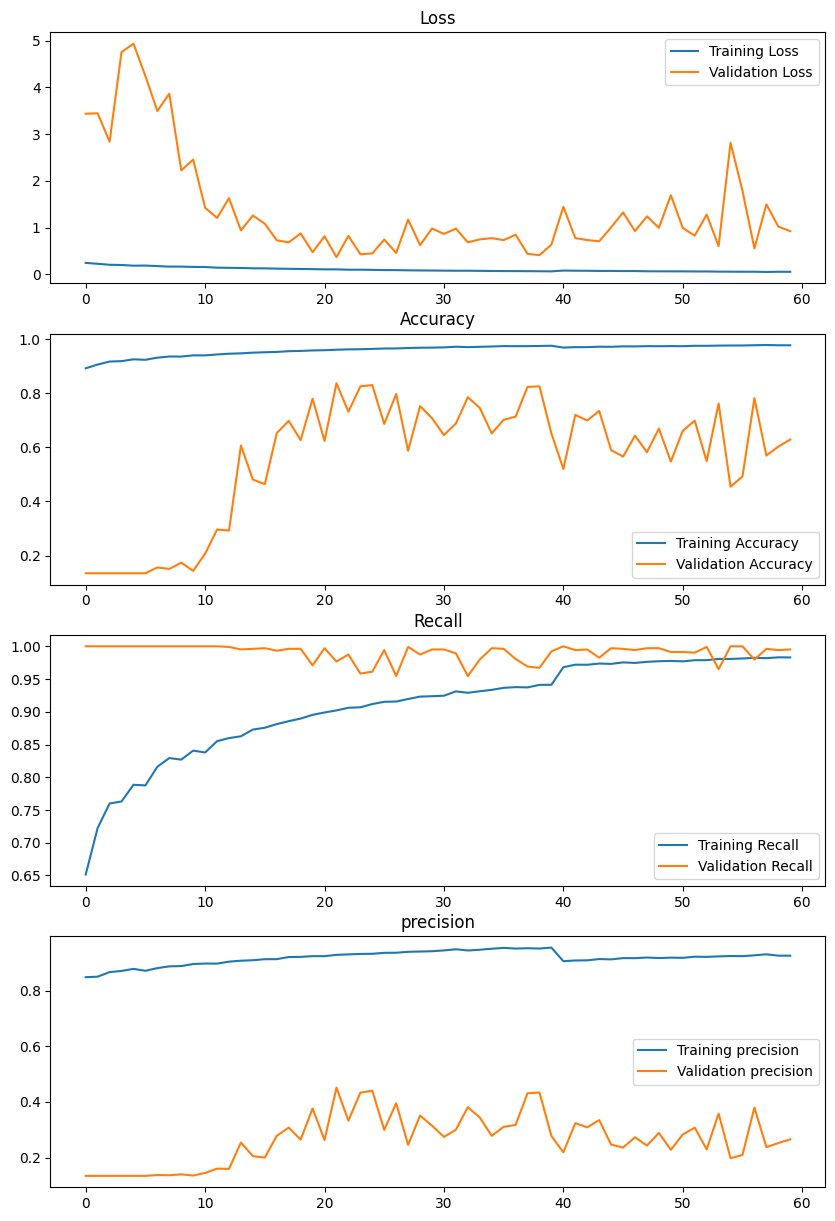

In [26]:
plot_histories([model_g_history.history, model_g_history2.history ], False)

In [27]:
model_g_history3 = model_g_custom.fit(train_dataset, validation_data=cv_dataset, epochs=170, callbacks=[best_val_recall_checkpoint, best_val_loss_checkpoint], class_weight=weights_dict)

Epoch 1/170
   1974/Unknown 164s 69ms/step - accuracy: 0.9678 - loss: 0.0841 - precision: 0.8385 - recall: 0.9705

2024-05-11 06:31:45.933226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:31:45.933411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 169s 72ms/step - accuracy: 0.9678 - loss: 0.0841 - precision: 0.8386 - recall: 0.9705 - val_accuracy: 0.7921 - val_loss: 0.4809 - val_precision: 0.3912 - val_recall: 0.9816
Epoch 2/170


2024-05-11 06:31:50.373301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:31:50.373389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9670 - loss: 0.0755 - precision: 0.8345 - recall: 0.9667

2024-05-11 06:33:57.696687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:33:57.697084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 132s 66ms/step - accuracy: 0.9670 - loss: 0.0755 - precision: 0.8346 - recall: 0.9667 - val_accuracy: 0.7712 - val_loss: 0.4855 - val_precision: 0.3677 - val_recall: 0.9758
Epoch 3/170


2024-05-11 06:34:02.006334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:34:02.006500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9710 - loss: 0.0688 - precision: 0.8512 - recall: 0.9707

2024-05-11 06:36:09.203100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:36:09.204028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 132s 66ms/step - accuracy: 0.9710 - loss: 0.0688 - precision: 0.8513 - recall: 0.9707 - val_accuracy: 0.6207 - val_loss: 0.7515 - val_precision: 0.2605 - val_recall: 0.9903
Epoch 4/170


2024-05-11 06:36:13.579527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:36:13.579590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9708 - loss: 0.0732 - precision: 0.8515 - recall: 0.9702

2024-05-11 06:38:19.390727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:38:19.390989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9709 - loss: 0.0732 - precision: 0.8516 - recall: 0.9702 - val_accuracy: 0.7506 - val_loss: 0.5592 - val_precision: 0.3486 - val_recall: 0.9845
Epoch 5/170


2024-05-11 06:38:23.611971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:38:23.612049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9717 - loss: 0.0726 - precision: 0.8542 - recall: 0.9703

2024-05-11 06:40:28.211901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:40:28.212655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9717 - loss: 0.0726 - precision: 0.8543 - recall: 0.9703 - val_accuracy: 0.6583 - val_loss: 0.9676 - val_precision: 0.2816 - val_recall: 0.9932
Epoch 6/170


2024-05-11 06:40:32.386982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:40:32.387125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9718 - loss: 0.0658 - precision: 0.8542 - recall: 0.9715

2024-05-11 06:42:37.212009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:42:37.212822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 06:42:41.520658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:42:41.520856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9718 - loss: 0.0658 - precision: 0.8543 - recall: 0.9716 - val_accuracy: 0.8274 - val_loss: 0.3536 - val_precision: 0.4353 - val_recall: 0.9535
Epoch 7/170
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9691 - loss: 0.0698 - precision: 0.8464 - recall: 0.9695

2024-05-11 06:44:46.204996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:44:46.205692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9691 - loss: 0.0698 - precision: 0.8465 - recall: 0.9695 - val_accuracy: 0.7160 - val_loss: 0.6887 - val_precision: 0.3207 - val_recall: 0.9952
Epoch 8/170


2024-05-11 06:44:50.456042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:44:50.456099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9751 - loss: 0.0593 - precision: 0.8679 - recall: 0.9755

2024-05-11 06:46:55.129099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:46:55.129815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9751 - loss: 0.0593 - precision: 0.8679 - recall: 0.9755 - val_accuracy: 0.7840 - val_loss: 0.5308 - val_precision: 0.3809 - val_recall: 0.9690
Epoch 9/170


2024-05-11 06:46:59.302938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:46:59.303258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9727 - loss: 0.0668 - precision: 0.8588 - recall: 0.9745

2024-05-11 06:49:03.889133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:49:03.889409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9727 - loss: 0.0667 - precision: 0.8588 - recall: 0.9745 - val_accuracy: 0.6566 - val_loss: 1.1383 - val_precision: 0.2808 - val_recall: 0.9952
Epoch 10/170


2024-05-11 06:49:08.088561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:49:08.088640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9712 - loss: 0.0750 - precision: 0.8499 - recall: 0.9728

2024-05-11 06:51:13.021000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:51:13.021304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9712 - loss: 0.0750 - precision: 0.8500 - recall: 0.9728 - val_accuracy: 0.6553 - val_loss: 0.7195 - val_precision: 0.2794 - val_recall: 0.9903
Epoch 11/170


2024-05-11 06:51:17.304477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:51:17.304750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9769 - loss: 0.0564 - precision: 0.8755 - recall: 0.9776

2024-05-11 06:53:22.366485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:53:22.366599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9769 - loss: 0.0564 - precision: 0.8756 - recall: 0.9776 - val_accuracy: 0.4606 - val_loss: 1.5522 - val_precision: 0.1993 - val_recall: 0.9981
Epoch 12/170


2024-05-11 06:53:26.575016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:53:26.575092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9712 - loss: 0.0678 - precision: 0.8556 - recall: 0.9769

2024-05-11 06:55:31.592426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:55:31.592688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9712 - loss: 0.0678 - precision: 0.8557 - recall: 0.9769 - val_accuracy: 0.6432 - val_loss: 1.1661 - val_precision: 0.2729 - val_recall: 0.9932
Epoch 13/170


2024-05-11 06:55:35.744248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:55:35.744308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9741 - loss: 0.0630 - precision: 0.8634 - recall: 0.9783

2024-05-11 06:57:40.163994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:57:40.164180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9741 - loss: 0.0630 - precision: 0.8635 - recall: 0.9783 - val_accuracy: 0.6040 - val_loss: 0.8131 - val_precision: 0.2525 - val_recall: 0.9923
Epoch 14/170


2024-05-11 06:57:44.367759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:57:44.367884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9751 - loss: 0.0608 - precision: 0.8686 - recall: 0.9747

2024-05-11 06:59:48.761299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:59:48.762023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9751 - loss: 0.0608 - precision: 0.8687 - recall: 0.9747 - val_accuracy: 0.8155 - val_loss: 0.3881 - val_precision: 0.4189 - val_recall: 0.9603
Epoch 15/170


2024-05-11 06:59:52.927870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 06:59:52.927945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9763 - loss: 0.0575 - precision: 0.8721 - recall: 0.9779

2024-05-11 07:01:57.007503: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:01:57.007870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9763 - loss: 0.0575 - precision: 0.8722 - recall: 0.9779 - val_accuracy: 0.7757 - val_loss: 0.4634 - val_precision: 0.3736 - val_recall: 0.9874
Epoch 16/170


2024-05-11 07:02:01.203249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:02:01.203577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9762 - loss: 0.0562 - precision: 0.8729 - recall: 0.9794

2024-05-11 07:04:04.720329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:04:04.721103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 07:04:08.842796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:04:08.842957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9762 - loss: 0.0561 - precision: 0.8729 - recall: 0.9794 - val_accuracy: 0.8063 - val_loss: 0.3888 - val_precision: 0.4056 - val_recall: 0.9458
Epoch 17/170
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9756 - loss: 0.0603 - precision: 0.8732 - recall: 0.9806

2024-05-11 07:06:13.287949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:06:13.288210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9756 - loss: 0.0602 - precision: 0.8733 - recall: 0.9806 - val_accuracy: 0.7890 - val_loss: 0.4672 - val_precision: 0.3867 - val_recall: 0.9710
Epoch 18/170


2024-05-11 07:06:17.426382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:06:17.426481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9761 - loss: 0.0562 - precision: 0.8715 - recall: 0.9782

2024-05-11 07:08:21.329316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:08:21.330106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9761 - loss: 0.0562 - precision: 0.8716 - recall: 0.9782 - val_accuracy: 0.8353 - val_loss: 0.3704 - val_precision: 0.4480 - val_recall: 0.9671
Epoch 19/170


2024-05-11 07:08:25.493147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:08:25.493213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9776 - loss: 0.0507 - precision: 0.8781 - recall: 0.9803

2024-05-11 07:10:29.760506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:10:29.761105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9777 - loss: 0.0507 - precision: 0.8781 - recall: 0.9803 - val_accuracy: 0.8349 - val_loss: 0.3836 - val_precision: 0.4473 - val_recall: 0.9661
Epoch 20/170


2024-05-11 07:10:33.964453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:10:33.964531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9782 - loss: 0.0554 - precision: 0.8814 - recall: 0.9831

2024-05-11 07:12:38.340018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:12:38.340680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9782 - loss: 0.0554 - precision: 0.8815 - recall: 0.9831 - val_accuracy: 0.7397 - val_loss: 0.5729 - val_precision: 0.3392 - val_recall: 0.9874
Epoch 21/170


2024-05-11 07:12:42.524741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:12:42.524814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9780 - loss: 0.0530 - precision: 0.8812 - recall: 0.9808

2024-05-11 07:14:46.745154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:14:46.746042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9780 - loss: 0.0529 - precision: 0.8813 - recall: 0.9808 - val_accuracy: 0.7757 - val_loss: 0.4220 - val_precision: 0.3725 - val_recall: 0.9758
Epoch 22/170


2024-05-11 07:14:50.924291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:14:50.924724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9762 - loss: 0.0540 - precision: 0.8716 - recall: 0.9797

2024-05-11 07:16:55.343500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:16:55.343824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 07:16:59.492511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:16:59.492860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9762 - loss: 0.0540 - precision: 0.8717 - recall: 0.9797 - val_accuracy: 0.8735 - val_loss: 0.3130 - val_precision: 0.5161 - val_recall: 0.9439
Epoch 23/170
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9794 - loss: 0.0544 - precision: 0.8881 - recall: 0.9827

2024-05-11 07:19:03.842644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:19:03.843025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9794 - loss: 0.0543 - precision: 0.8882 - recall: 0.9827 - val_accuracy: 0.5743 - val_loss: 1.6034 - val_precision: 0.2393 - val_recall: 0.9942
Epoch 24/170


2024-05-11 07:19:08.019135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:19:08.019274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9775 - loss: 0.0552 - precision: 0.8789 - recall: 0.9825

2024-05-11 07:21:12.519125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:21:12.519272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9775 - loss: 0.0552 - precision: 0.8789 - recall: 0.9825 - val_accuracy: 0.8168 - val_loss: 0.4178 - val_precision: 0.4216 - val_recall: 0.9739
Epoch 25/170


2024-05-11 07:21:16.646368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:21:16.646688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9796 - loss: 0.0498 - precision: 0.8882 - recall: 0.9819

2024-05-11 07:23:20.519516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:23:20.520251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9796 - loss: 0.0498 - precision: 0.8882 - recall: 0.9819 - val_accuracy: 0.6653 - val_loss: 0.8291 - val_precision: 0.2862 - val_recall: 0.9961
Epoch 26/170


2024-05-11 07:23:24.659430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:23:24.659860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9786 - loss: 0.0564 - precision: 0.8848 - recall: 0.9815

2024-05-11 07:25:29.099357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:25:29.100154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9786 - loss: 0.0564 - precision: 0.8849 - recall: 0.9816 - val_accuracy: 0.7885 - val_loss: 0.5543 - val_precision: 0.3874 - val_recall: 0.9855
Epoch 27/170


2024-05-11 07:25:33.289878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:25:33.289952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9803 - loss: 0.0500 - precision: 0.8917 - recall: 0.9822

2024-05-11 07:27:37.913612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:27:37.914365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9803 - loss: 0.0500 - precision: 0.8917 - recall: 0.9822 - val_accuracy: 0.6967 - val_loss: 0.7760 - val_precision: 0.3054 - val_recall: 0.9855
Epoch 28/170


2024-05-11 07:27:42.087670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:27:42.088040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9785 - loss: 0.0494 - precision: 0.8837 - recall: 0.9829

2024-05-11 07:29:46.129345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:29:46.129912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9785 - loss: 0.0494 - precision: 0.8838 - recall: 0.9829 - val_accuracy: 0.6366 - val_loss: 1.0614 - val_precision: 0.2698 - val_recall: 0.9981
Epoch 29/170


2024-05-11 07:29:50.290887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:29:50.291004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9815 - loss: 0.0449 - precision: 0.8982 - recall: 0.9840

2024-05-11 07:31:54.958853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:31:54.959511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9815 - loss: 0.0449 - precision: 0.8982 - recall: 0.9840 - val_accuracy: 0.7951 - val_loss: 0.4875 - val_precision: 0.3947 - val_recall: 0.9816
Epoch 30/170


2024-05-11 07:31:59.150267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:31:59.150498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9760 - loss: 0.0572 - precision: 0.8737 - recall: 0.9809

2024-05-11 07:34:03.153957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:34:03.154318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9760 - loss: 0.0572 - precision: 0.8738 - recall: 0.9809 - val_accuracy: 0.5271 - val_loss: 1.2296 - val_precision: 0.2209 - val_recall: 0.9961
Epoch 31/170


2024-05-11 07:34:07.278544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:34:07.278618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9784 - loss: 0.0552 - precision: 0.8837 - recall: 0.9815

2024-05-11 07:36:11.666924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:36:11.667093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9784 - loss: 0.0552 - precision: 0.8837 - recall: 0.9815 - val_accuracy: 0.7717 - val_loss: 0.4468 - val_precision: 0.3690 - val_recall: 0.9826
Epoch 32/170


2024-05-11 07:36:15.912962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:36:15.913171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9824 - loss: 0.0459 - precision: 0.9030 - recall: 0.9856

2024-05-11 07:38:21.697375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:38:21.698299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9824 - loss: 0.0458 - precision: 0.9031 - recall: 0.9856 - val_accuracy: 0.7615 - val_loss: 0.5255 - val_precision: 0.3592 - val_recall: 0.9864
Epoch 33/170


2024-05-11 07:38:26.482868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:38:26.482939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9806 - loss: 0.0463 - precision: 0.8953 - recall: 0.9819

2024-05-11 07:40:31.267382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:40:31.267624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9806 - loss: 0.0463 - precision: 0.8954 - recall: 0.9819 - val_accuracy: 0.8499 - val_loss: 0.3267 - val_precision: 0.4718 - val_recall: 0.9700
Epoch 34/170


2024-05-11 07:40:35.479642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:40:35.479718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9818 - loss: 0.0400 - precision: 0.8988 - recall: 0.9836

2024-05-11 07:42:40.249346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:42:40.250052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9818 - loss: 0.0400 - precision: 0.8989 - recall: 0.9836 - val_accuracy: 0.5681 - val_loss: 1.0849 - val_precision: 0.2367 - val_recall: 0.9942
Epoch 35/170


2024-05-11 07:42:44.480589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:42:44.480909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9794 - loss: 0.0500 - precision: 0.8896 - recall: 0.9817

2024-05-11 07:44:49.174310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:44:49.175137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9794 - loss: 0.0500 - precision: 0.8897 - recall: 0.9817 - val_accuracy: 0.6891 - val_loss: 0.6151 - val_precision: 0.3008 - val_recall: 0.9903
Epoch 36/170


2024-05-11 07:44:53.488200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:44:53.488289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9822 - loss: 0.0431 - precision: 0.9000 - recall: 0.9835

2024-05-11 07:46:58.882446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:46:58.883153: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9822 - loss: 0.0431 - precision: 0.9000 - recall: 0.9835 - val_accuracy: 0.4641 - val_loss: 1.1321 - val_precision: 0.2002 - val_recall: 0.9971
Epoch 37/170


2024-05-11 07:47:03.227509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:47:03.227610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9801 - loss: 0.0532 - precision: 0.8935 - recall: 0.9836

2024-05-11 07:49:08.257089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:49:08.257776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9801 - loss: 0.0532 - precision: 0.8935 - recall: 0.9836 - val_accuracy: 0.6371 - val_loss: 0.7229 - val_precision: 0.2699 - val_recall: 0.9961
Epoch 38/170


2024-05-11 07:49:12.432238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:49:12.432305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9819 - loss: 0.0427 - precision: 0.8997 - recall: 0.9863

2024-05-11 07:51:17.027634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:51:17.027799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9819 - loss: 0.0427 - precision: 0.8998 - recall: 0.9863 - val_accuracy: 0.5587 - val_loss: 1.1408 - val_precision: 0.2332 - val_recall: 0.9971
Epoch 39/170


2024-05-11 07:51:21.201833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:51:21.201898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9829 - loss: 0.0392 - precision: 0.9023 - recall: 0.9858

2024-05-11 07:53:25.605967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:53:25.606699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9829 - loss: 0.0392 - precision: 0.9024 - recall: 0.9858 - val_accuracy: 0.6911 - val_loss: 0.7693 - val_precision: 0.3025 - val_recall: 0.9932
Epoch 40/170


2024-05-11 07:53:29.821660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:53:29.821742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9833 - loss: 0.0404 - precision: 0.9038 - recall: 0.9863

2024-05-11 07:55:33.817944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:55:33.818634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9833 - loss: 0.0404 - precision: 0.9038 - recall: 0.9863 - val_accuracy: 0.3957 - val_loss: 1.6816 - val_precision: 0.1819 - val_recall: 0.9990
Epoch 41/170


2024-05-11 07:55:38.030639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:55:38.030702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9810 - loss: 0.0446 - precision: 0.8956 - recall: 0.9838

2024-05-11 07:57:41.868655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:57:41.869009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9810 - loss: 0.0446 - precision: 0.8956 - recall: 0.9838 - val_accuracy: 0.6828 - val_loss: 0.7269 - val_precision: 0.2966 - val_recall: 0.9913
Epoch 42/170


2024-05-11 07:57:46.101175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:57:46.101237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 07:57:46.101565: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 07:57:46.101617: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9832 - loss: 0.0429 - precision: 0.9062 - recall: 0.9852

2024-05-11 07:59:50.292209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:59:50.292968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9832 - loss: 0.0428 - precision: 0.9063 - recall: 0.9852 - val_accuracy: 0.6414 - val_loss: 0.7486 - val_precision: 0.2711 - val_recall: 0.9874
Epoch 43/170


2024-05-11 07:59:54.490937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 07:59:54.491002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9830 - loss: 0.0370 - precision: 0.9053 - recall: 0.9864

2024-05-11 08:01:58.973097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:01:58.973430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9830 - loss: 0.0370 - precision: 0.9053 - recall: 0.9864 - val_accuracy: 0.6392 - val_loss: 0.8210 - val_precision: 0.2700 - val_recall: 0.9884
Epoch 44/170


2024-05-11 08:02:03.228936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:02:03.229030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9822 - loss: 0.0446 - precision: 0.9024 - recall: 0.9863

2024-05-11 08:04:07.079763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:04:07.080005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9822 - loss: 0.0446 - precision: 0.9025 - recall: 0.9863 - val_accuracy: 0.6156 - val_loss: 0.8923 - val_precision: 0.2584 - val_recall: 0.9942
Epoch 45/170


2024-05-11 08:04:11.298909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:04:11.299149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9828 - loss: 0.0399 - precision: 0.9062 - recall: 0.9864

2024-05-11 08:06:16.093327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:06:16.093437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 08:06:16.093458: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 08:06:16.093467: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 08:06:16.093508: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7056433470708498814


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9828 - loss: 0.0399 - precision: 0.9062 - recall: 0.9864 - val_accuracy: 0.6200 - val_loss: 0.7104 - val_precision: 0.2604 - val_recall: 0.9923
Epoch 46/170


2024-05-11 08:06:20.289210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:06:20.289359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9851 - loss: 0.0340 - precision: 0.9166 - recall: 0.9872

2024-05-11 08:08:24.710037: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:08:24.710489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9851 - loss: 0.0340 - precision: 0.9167 - recall: 0.9872 - val_accuracy: 0.7419 - val_loss: 0.5742 - val_precision: 0.3405 - val_recall: 0.9816
Epoch 47/170


2024-05-11 08:08:28.983297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:08:28.983381: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9844 - loss: 0.0400 - precision: 0.9132 - recall: 0.9859

2024-05-11 08:10:33.243227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:10:33.243957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9844 - loss: 0.0400 - precision: 0.9133 - recall: 0.9859 - val_accuracy: 0.7163 - val_loss: 0.6787 - val_precision: 0.3206 - val_recall: 0.9913
Epoch 48/170


2024-05-11 08:10:37.432570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:10:37.432665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9851 - loss: 0.0355 - precision: 0.9166 - recall: 0.9860

2024-05-11 08:12:42.092594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:12:42.092746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9851 - loss: 0.0355 - precision: 0.9167 - recall: 0.9860 - val_accuracy: 0.7680 - val_loss: 0.5525 - val_precision: 0.3659 - val_recall: 0.9894
Epoch 49/170


2024-05-11 08:12:46.362914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:12:46.363068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9811 - loss: 0.0441 - precision: 0.8994 - recall: 0.9836

2024-05-11 08:14:50.842976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:14:50.843270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9812 - loss: 0.0441 - precision: 0.8995 - recall: 0.9836 - val_accuracy: 0.5913 - val_loss: 1.0398 - val_precision: 0.2472 - val_recall: 0.9971
Epoch 50/170


2024-05-11 08:14:55.021763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:14:55.021879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9839 - loss: 0.0390 - precision: 0.9106 - recall: 0.9841

2024-05-11 08:16:59.411828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:16:59.411937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9839 - loss: 0.0390 - precision: 0.9106 - recall: 0.9841 - val_accuracy: 0.6392 - val_loss: 0.8632 - val_precision: 0.2704 - val_recall: 0.9913
Epoch 51/170


2024-05-11 08:17:03.621949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:17:03.622241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9849 - loss: 0.0366 - precision: 0.9137 - recall: 0.9866

2024-05-11 08:19:07.768830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:19:07.769614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9849 - loss: 0.0366 - precision: 0.9137 - recall: 0.9866 - val_accuracy: 0.6809 - val_loss: 0.6713 - val_precision: 0.2956 - val_recall: 0.9923
Epoch 52/170


2024-05-11 08:19:11.921771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:19:11.922003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9846 - loss: 0.0391 - precision: 0.9149 - recall: 0.9849

2024-05-11 08:21:17.088233: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:21:17.088988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9846 - loss: 0.0391 - precision: 0.9149 - recall: 0.9849 - val_accuracy: 0.6207 - val_loss: 1.0370 - val_precision: 0.2607 - val_recall: 0.9923
Epoch 53/170


2024-05-11 08:21:21.281808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:21:21.281899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9855 - loss: 0.0353 - precision: 0.9191 - recall: 0.9870

2024-05-11 08:23:25.952955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:23:25.953321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9855 - loss: 0.0353 - precision: 0.9191 - recall: 0.9870 - val_accuracy: 0.5008 - val_loss: 1.6819 - val_precision: 0.2118 - val_recall: 0.9971
Epoch 54/170


2024-05-11 08:23:30.242785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:23:30.242864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9831 - loss: 0.0432 - precision: 0.9084 - recall: 0.9864

2024-05-11 08:25:35.091744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:25:35.092105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9831 - loss: 0.0432 - precision: 0.9084 - recall: 0.9864 - val_accuracy: 0.6571 - val_loss: 0.8461 - val_precision: 0.2807 - val_recall: 0.9923
Epoch 55/170


2024-05-11 08:25:39.287891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:25:39.288005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9856 - loss: 0.0369 - precision: 0.9192 - recall: 0.9864

2024-05-11 08:27:45.009769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:27:45.010097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9856 - loss: 0.0369 - precision: 0.9192 - recall: 0.9864 - val_accuracy: 0.7130 - val_loss: 0.7085 - val_precision: 0.3177 - val_recall: 0.9884
Epoch 56/170


2024-05-11 08:27:49.343190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:27:49.343395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9873 - loss: 0.0321 - precision: 0.9260 - recall: 0.9886

2024-05-11 08:29:54.685365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:29:54.685724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 65ms/step - accuracy: 0.9873 - loss: 0.0321 - precision: 0.9260 - recall: 0.9886 - val_accuracy: 0.6574 - val_loss: 1.0333 - val_precision: 0.2816 - val_recall: 0.9981
Epoch 57/170


2024-05-11 08:29:58.947552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:29:58.947890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9838 - loss: 0.0376 - precision: 0.9087 - recall: 0.9856

2024-05-11 08:32:04.270692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:32:04.271377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 08:32:08.520095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:32:08.520180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9838 - loss: 0.0376 - precision: 0.9087 - recall: 0.9856 - val_accuracy: 0.3931 - val_loss: 2.1263 - val_precision: 0.1704 - val_recall: 0.9080
Epoch 58/170
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9839 - loss: 0.0362 - precision: 0.9134 - recall: 0.9877

2024-05-11 08:34:14.256139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:34:14.256527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9839 - loss: 0.0362 - precision: 0.9135 - recall: 0.9877 - val_accuracy: 0.6626 - val_loss: 0.7629 - val_precision: 0.2844 - val_recall: 0.9952
Epoch 59/170


2024-05-11 08:34:18.465689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:34:18.465792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9860 - loss: 0.0365 - precision: 0.9199 - recall: 0.9874

2024-05-11 08:36:22.648912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:36:22.649304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9860 - loss: 0.0365 - precision: 0.9199 - recall: 0.9874 - val_accuracy: 0.6190 - val_loss: 1.1157 - val_precision: 0.2599 - val_recall: 0.9923
Epoch 60/170


2024-05-11 08:36:26.847640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:36:26.848064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9868 - loss: 0.0303 - precision: 0.9233 - recall: 0.9901

2024-05-11 08:38:31.661932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:38:31.662764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9868 - loss: 0.0303 - precision: 0.9233 - recall: 0.9901 - val_accuracy: 0.6343 - val_loss: 1.0164 - val_precision: 0.2679 - val_recall: 0.9923
Epoch 61/170


2024-05-11 08:38:35.872276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:38:35.872356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9873 - loss: 0.0283 - precision: 0.9287 - recall: 0.9882

2024-05-11 08:40:40.447256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:40:40.447971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9873 - loss: 0.0283 - precision: 0.9288 - recall: 0.9882 - val_accuracy: 0.7098 - val_loss: 0.9007 - val_precision: 0.3155 - val_recall: 0.9903
Epoch 62/170


2024-05-11 08:40:44.638147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:40:44.638496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9854 - loss: 0.0344 - precision: 0.9200 - recall: 0.9834

2024-05-11 08:42:48.966444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:42:48.966769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9854 - loss: 0.0344 - precision: 0.9201 - recall: 0.9834 - val_accuracy: 0.6284 - val_loss: 1.5103 - val_precision: 0.2647 - val_recall: 0.9923
Epoch 63/170


2024-05-11 08:42:53.247551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:42:53.247633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9867 - loss: 0.0348 - precision: 0.9233 - recall: 0.9890

2024-05-11 08:44:57.102019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:44:57.103112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9867 - loss: 0.0348 - precision: 0.9234 - recall: 0.9890 - val_accuracy: 0.7508 - val_loss: 0.9000 - val_precision: 0.3495 - val_recall: 0.9903
Epoch 64/170


2024-05-11 08:45:01.262959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:45:01.263033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9878 - loss: 0.0297 - precision: 0.9262 - recall: 0.9905

2024-05-11 08:47:05.314265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:47:05.314997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9878 - loss: 0.0297 - precision: 0.9263 - recall: 0.9905 - val_accuracy: 0.4751 - val_loss: 2.6454 - val_precision: 0.2032 - val_recall: 0.9942
Epoch 65/170


2024-05-11 08:47:09.479177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:47:09.479258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9860 - loss: 0.0346 - precision: 0.9192 - recall: 0.9879

2024-05-11 08:49:15.514402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:49:15.515040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9860 - loss: 0.0346 - precision: 0.9192 - recall: 0.9879 - val_accuracy: 0.6643 - val_loss: 0.9509 - val_precision: 0.2852 - val_recall: 0.9932
Epoch 66/170


2024-05-11 08:49:19.949890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:49:19.949968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9873 - loss: 0.0317 - precision: 0.9275 - recall: 0.9878

2024-05-11 08:51:24.517799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:51:24.517871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9873 - loss: 0.0317 - precision: 0.9275 - recall: 0.9878 - val_accuracy: 0.5118 - val_loss: 1.3799 - val_precision: 0.2157 - val_recall: 0.9981
Epoch 67/170


2024-05-11 08:51:28.742818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:51:28.742894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9874 - loss: 0.0319 - precision: 0.9268 - recall: 0.9890

2024-05-11 08:53:33.284138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:53:33.284916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9874 - loss: 0.0319 - precision: 0.9268 - recall: 0.9890 - val_accuracy: 0.6303 - val_loss: 0.8862 - val_precision: 0.2658 - val_recall: 0.9923
Epoch 68/170


2024-05-11 08:53:37.438826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:53:37.438896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9881 - loss: 0.0287 - precision: 0.9324 - recall: 0.9876

2024-05-11 08:55:41.847629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:55:41.848417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9881 - loss: 0.0287 - precision: 0.9324 - recall: 0.9876 - val_accuracy: 0.7205 - val_loss: 0.8767 - val_precision: 0.3236 - val_recall: 0.9894
Epoch 69/170


2024-05-11 08:55:46.048985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:55:46.049039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9898 - loss: 0.0278 - precision: 0.9403 - recall: 0.9889

2024-05-11 08:57:50.224286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:57:50.224541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9898 - loss: 0.0278 - precision: 0.9403 - recall: 0.9889 - val_accuracy: 0.6177 - val_loss: 1.7763 - val_precision: 0.2598 - val_recall: 0.9971
Epoch 70/170


2024-05-11 08:57:54.432526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:57:54.432661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9873 - loss: 0.0317 - precision: 0.9273 - recall: 0.9913

2024-05-11 08:59:58.571787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 08:59:58.572141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9873 - loss: 0.0317 - precision: 0.9274 - recall: 0.9913 - val_accuracy: 0.6822 - val_loss: 0.7258 - val_precision: 0.2959 - val_recall: 0.9884
Epoch 71/170


2024-05-11 09:00:02.899644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:00:02.899727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9876 - loss: 0.0279 - precision: 0.9289 - recall: 0.9900

2024-05-11 09:02:08.167055: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:02:08.167424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 65ms/step - accuracy: 0.9876 - loss: 0.0279 - precision: 0.9289 - recall: 0.9900 - val_accuracy: 0.7180 - val_loss: 0.8240 - val_precision: 0.3218 - val_recall: 0.9903
Epoch 72/170


2024-05-11 09:02:12.436089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:02:12.436356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9885 - loss: 0.0283 - precision: 0.9324 - recall: 0.9904

2024-05-11 09:04:17.019029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:04:17.019099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9885 - loss: 0.0283 - precision: 0.9324 - recall: 0.9904 - val_accuracy: 0.7596 - val_loss: 0.6536 - val_precision: 0.3570 - val_recall: 0.9835
Epoch 73/170


2024-05-11 09:04:21.301529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:04:21.302039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9890 - loss: 0.0287 - precision: 0.9361 - recall: 0.9891

2024-05-11 09:06:25.467103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:06:25.467380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9890 - loss: 0.0287 - precision: 0.9361 - recall: 0.9891 - val_accuracy: 0.6204 - val_loss: 1.4627 - val_precision: 0.2611 - val_recall: 0.9961
Epoch 74/170


2024-05-11 09:06:29.745395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:06:29.745476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9858 - loss: 0.0398 - precision: 0.9212 - recall: 0.9880

2024-05-11 09:08:34.548063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:08:34.548363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9858 - loss: 0.0398 - precision: 0.9212 - recall: 0.9880 - val_accuracy: 0.7416 - val_loss: 0.8593 - val_precision: 0.3407 - val_recall: 0.9855
Epoch 75/170


2024-05-11 09:08:38.745994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:08:38.746122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9837 - loss: 0.0362 - precision: 0.9103 - recall: 0.9865

2024-05-11 09:10:43.650952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:10:43.651313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9837 - loss: 0.0362 - precision: 0.9103 - recall: 0.9865 - val_accuracy: 0.7603 - val_loss: 0.7436 - val_precision: 0.3580 - val_recall: 0.9864
Epoch 76/170


2024-05-11 09:10:47.885122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:10:47.885252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9899 - loss: 0.0265 - precision: 0.9391 - recall: 0.9909

2024-05-11 09:12:52.245544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:12:52.245844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9899 - loss: 0.0265 - precision: 0.9391 - recall: 0.9909 - val_accuracy: 0.5853 - val_loss: 1.3083 - val_precision: 0.2444 - val_recall: 0.9961
Epoch 77/170


2024-05-11 09:12:56.446417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:12:56.446474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9878 - loss: 0.0291 - precision: 0.9303 - recall: 0.9895

2024-05-11 09:15:00.594412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:15:00.594673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9878 - loss: 0.0291 - precision: 0.9304 - recall: 0.9896 - val_accuracy: 0.7467 - val_loss: 0.7448 - val_precision: 0.3453 - val_recall: 0.9864
Epoch 78/170


2024-05-11 09:15:04.762306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:15:04.762411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9886 - loss: 0.0291 - precision: 0.9348 - recall: 0.9916

2024-05-11 09:17:08.883868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:17:08.884062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9886 - loss: 0.0291 - precision: 0.9349 - recall: 0.9916 - val_accuracy: 0.6753 - val_loss: 0.9652 - val_precision: 0.2921 - val_recall: 0.9932
Epoch 79/170


2024-05-11 09:17:13.079078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:17:13.079129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9893 - loss: 0.0299 - precision: 0.9375 - recall: 0.9907

2024-05-11 09:19:17.124197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:19:17.124979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9893 - loss: 0.0299 - precision: 0.9375 - recall: 0.9907 - val_accuracy: 0.6984 - val_loss: 0.8144 - val_precision: 0.3070 - val_recall: 0.9884
Epoch 80/170


2024-05-11 09:19:21.343455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:19:21.343605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9884 - loss: 0.0307 - precision: 0.9322 - recall: 0.9922

2024-05-11 09:21:25.923978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:21:25.924249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9884 - loss: 0.0307 - precision: 0.9322 - recall: 0.9922 - val_accuracy: 0.7002 - val_loss: 1.4222 - val_precision: 0.3073 - val_recall: 0.9806
Epoch 81/170


2024-05-11 09:21:30.322260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:21:30.322354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9878 - loss: 0.0298 - precision: 0.9303 - recall: 0.9893

2024-05-11 09:23:35.489814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:23:35.490090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9878 - loss: 0.0298 - precision: 0.9304 - recall: 0.9893 - val_accuracy: 0.7903 - val_loss: 0.6773 - val_precision: 0.3881 - val_recall: 0.9700
Epoch 82/170


2024-05-11 09:23:39.702656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:23:39.702737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9892 - loss: 0.0266 - precision: 0.9368 - recall: 0.9892

2024-05-11 09:25:44.848925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:25:44.849653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9892 - loss: 0.0266 - precision: 0.9368 - recall: 0.9892 - val_accuracy: 0.7751 - val_loss: 0.6356 - val_precision: 0.3723 - val_recall: 0.9806
Epoch 83/170


2024-05-11 09:25:49.124443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:25:49.124612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9903 - loss: 0.0229 - precision: 0.9433 - recall: 0.9919

2024-05-11 09:27:54.148267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:27:54.148967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9903 - loss: 0.0229 - precision: 0.9433 - recall: 0.9919 - val_accuracy: 0.6403 - val_loss: 1.1629 - val_precision: 0.2713 - val_recall: 0.9932
Epoch 84/170


2024-05-11 09:27:58.339112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:27:58.339171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9878 - loss: 0.0285 - precision: 0.9290 - recall: 0.9905

2024-05-11 09:30:03.406528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:30:03.406897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9878 - loss: 0.0285 - precision: 0.9290 - recall: 0.9905 - val_accuracy: 0.8480 - val_loss: 0.4174 - val_precision: 0.4681 - val_recall: 0.9593
Epoch 85/170


2024-05-11 09:30:07.605950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:30:07.606131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9902 - loss: 0.0259 - precision: 0.9416 - recall: 0.9904

2024-05-11 09:32:12.145851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:32:12.145918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 09:32:12.145935: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 09:32:12.145948: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 09:32:12.145953: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7056433470708498814


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9902 - loss: 0.0259 - precision: 0.9416 - recall: 0.9904 - val_accuracy: 0.7572 - val_loss: 0.6399 - val_precision: 0.3546 - val_recall: 0.9826
Epoch 86/170


2024-05-11 09:32:16.382344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:32:16.382413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9890 - loss: 0.0279 - precision: 0.9352 - recall: 0.9893

2024-05-11 09:34:20.328889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:34:20.329274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9890 - loss: 0.0279 - precision: 0.9353 - recall: 0.9893 - val_accuracy: 0.7808 - val_loss: 0.5553 - val_precision: 0.3781 - val_recall: 0.9777
Epoch 87/170


2024-05-11 09:34:24.457983: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:34:24.458190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9910 - loss: 0.0203 - precision: 0.9465 - recall: 0.9922

2024-05-11 09:36:28.732287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:36:28.732991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9910 - loss: 0.0203 - precision: 0.9465 - recall: 0.9922 - val_accuracy: 0.6793 - val_loss: 0.9417 - val_precision: 0.2934 - val_recall: 0.9835
Epoch 88/170


2024-05-11 09:36:32.915857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:36:32.915926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9881 - loss: 0.0288 - precision: 0.9319 - recall: 0.9905

2024-05-11 09:38:37.678055: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:38:37.678400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9881 - loss: 0.0288 - precision: 0.9319 - recall: 0.9905 - val_accuracy: 0.7908 - val_loss: 0.5120 - val_precision: 0.3889 - val_recall: 0.9729
Epoch 89/170


2024-05-11 09:38:41.897921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:38:41.897990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9870 - loss: 0.0314 - precision: 0.9273 - recall: 0.9892

2024-05-11 09:40:46.403057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:40:46.403323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9870 - loss: 0.0314 - precision: 0.9274 - recall: 0.9893 - val_accuracy: 0.7257 - val_loss: 0.8918 - val_precision: 0.3277 - val_recall: 0.9884
Epoch 90/170


2024-05-11 09:40:50.589230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:40:50.589386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9882 - loss: 0.0296 - precision: 0.9336 - recall: 0.9873

2024-05-11 09:42:54.990906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:42:54.991624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9882 - loss: 0.0296 - precision: 0.9336 - recall: 0.9873 - val_accuracy: 0.6410 - val_loss: 1.0695 - val_precision: 0.2719 - val_recall: 0.9952
Epoch 91/170


2024-05-11 09:42:59.204618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:42:59.204700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9912 - loss: 0.0199 - precision: 0.9477 - recall: 0.9934

2024-05-11 09:45:03.916397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:45:03.916468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 09:45:03.916484: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 09:45:03.916493: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 09:45:03.916536: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7056433470708498814


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9912 - loss: 0.0199 - precision: 0.9478 - recall: 0.9934 - val_accuracy: 0.3037 - val_loss: 2.5263 - val_precision: 0.1613 - val_recall: 0.9952
Epoch 92/170


2024-05-11 09:45:08.135786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:45:08.136166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9891 - loss: 0.0259 - precision: 0.9358 - recall: 0.9897

2024-05-11 09:47:13.967026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:47:13.967252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9891 - loss: 0.0259 - precision: 0.9358 - recall: 0.9897 - val_accuracy: 0.6731 - val_loss: 1.0551 - val_precision: 0.2899 - val_recall: 0.9874
Epoch 93/170


2024-05-11 09:47:18.581049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:47:18.581331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9894 - loss: 0.0282 - precision: 0.9375 - recall: 0.9889

2024-05-11 09:49:23.160000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:49:23.160146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9894 - loss: 0.0282 - precision: 0.9376 - recall: 0.9889 - val_accuracy: 0.7745 - val_loss: 0.7107 - val_precision: 0.3723 - val_recall: 0.9864
Epoch 94/170


2024-05-11 09:49:27.400750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:49:27.400907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9904 - loss: 0.0222 - precision: 0.9446 - recall: 0.9918

2024-05-11 09:51:31.691154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:51:31.691491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9904 - loss: 0.0222 - precision: 0.9447 - recall: 0.9918 - val_accuracy: 0.6207 - val_loss: 1.1758 - val_precision: 0.2614 - val_recall: 0.9971
Epoch 95/170


2024-05-11 09:51:35.930303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:51:35.931365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9884 - loss: 0.0305 - precision: 0.9335 - recall: 0.9905

2024-05-11 09:53:40.436900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:53:40.437632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9884 - loss: 0.0305 - precision: 0.9336 - recall: 0.9905 - val_accuracy: 0.8565 - val_loss: 0.4462 - val_precision: 0.4834 - val_recall: 0.9748
Epoch 96/170


2024-05-11 09:53:44.613568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:53:44.613720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9902 - loss: 0.0253 - precision: 0.9416 - recall: 0.9922

2024-05-11 09:55:49.444798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:55:49.444873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9902 - loss: 0.0253 - precision: 0.9417 - recall: 0.9922 - val_accuracy: 0.8025 - val_loss: 0.5537 - val_precision: 0.4027 - val_recall: 0.9700
Epoch 97/170


2024-05-11 09:55:53.632116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:55:53.632388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9905 - loss: 0.0271 - precision: 0.9431 - recall: 0.9925

2024-05-11 09:57:57.963342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:57:57.963957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9905 - loss: 0.0271 - precision: 0.9431 - recall: 0.9925 - val_accuracy: 0.7032 - val_loss: 0.8631 - val_precision: 0.3117 - val_recall: 0.9990
Epoch 98/170


2024-05-11 09:58:02.143940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 09:58:02.144059: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9880 - loss: 0.0298 - precision: 0.9312 - recall: 0.9906

2024-05-11 10:00:06.977966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:00:06.978246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:00:11.253549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:00:11.253776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9880 - loss: 0.0298 - precision: 0.9313 - recall: 0.9906 - val_accuracy: 0.9022 - val_loss: 0.2621 - val_precision: 0.5854 - val_recall: 0.9361
Epoch 99/170
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9898 - loss: 0.0247 - precision: 0.9394 - recall: 0.9928

2024-05-11 10:02:16.316312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:02:16.317089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9898 - loss: 0.0247 - precision: 0.9394 - recall: 0.9928 - val_accuracy: 0.8668 - val_loss: 0.3443 - val_precision: 0.5025 - val_recall: 0.9564
Epoch 100/170


2024-05-11 10:02:20.583404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:02:20.583501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9902 - loss: 0.0227 - precision: 0.9420 - recall: 0.9912

2024-05-11 10:04:26.465196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:04:26.465409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9902 - loss: 0.0226 - precision: 0.9420 - recall: 0.9912 - val_accuracy: 0.8972 - val_loss: 0.2737 - val_precision: 0.5719 - val_recall: 0.9361
Epoch 101/170


2024-05-11 10:04:31.114316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:04:31.114372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:04:31.114386: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 10:04:31.114419: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9910 - loss: 0.0211 - precision: 0.9481 - recall: 0.9924

2024-05-11 10:06:37.276497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:06:37.276579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:06:37.276598: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 10:06:37.276609: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 10:06:37.276614: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7056433470708498814


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9910 - loss: 0.0211 - precision: 0.9482 - recall: 0.9924 - val_accuracy: 0.5952 - val_loss: 1.2133 - val_precision: 0.2485 - val_recall: 0.9932
Epoch 102/170


2024-05-11 10:06:41.654813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:06:41.654892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9898 - loss: 0.0230 - precision: 0.9421 - recall: 0.9917

2024-05-11 10:08:47.711389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:08:47.712149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9899 - loss: 0.0230 - precision: 0.9422 - recall: 0.9917 - val_accuracy: 0.8637 - val_loss: 0.3747 - val_precision: 0.4965 - val_recall: 0.9661
Epoch 103/170


2024-05-11 10:08:52.043077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:08:52.043127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9889 - loss: 0.0299 - precision: 0.9369 - recall: 0.9887

2024-05-11 10:10:58.963899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:10:58.964695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9889 - loss: 0.0299 - precision: 0.9369 - recall: 0.9887 - val_accuracy: 0.7758 - val_loss: 0.9057 - val_precision: 0.3735 - val_recall: 0.9845
Epoch 104/170


2024-05-11 10:11:03.211559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:11:03.211908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9902 - loss: 0.0255 - precision: 0.9436 - recall: 0.9900

2024-05-11 10:13:10.056537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:13:10.058740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9902 - loss: 0.0255 - precision: 0.9437 - recall: 0.9900 - val_accuracy: 0.4298 - val_loss: 1.6219 - val_precision: 0.1908 - val_recall: 1.0000
Epoch 105/170


2024-05-11 10:13:14.568247: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:13:14.568328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9896 - loss: 0.0286 - precision: 0.9392 - recall: 0.9898

2024-05-11 10:15:21.326470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:15:21.327189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9896 - loss: 0.0286 - precision: 0.9393 - recall: 0.9898 - val_accuracy: 0.6017 - val_loss: 0.9701 - val_precision: 0.2517 - val_recall: 0.9942
Epoch 106/170


2024-05-11 10:15:25.723982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:15:25.724140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9913 - loss: 0.0231 - precision: 0.9481 - recall: 0.9933

2024-05-11 10:17:32.343309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:17:32.343561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9913 - loss: 0.0231 - precision: 0.9482 - recall: 0.9933 - val_accuracy: 0.6940 - val_loss: 0.7966 - val_precision: 0.3042 - val_recall: 0.9913
Epoch 107/170


2024-05-11 10:17:36.572512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:17:36.572602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9904 - loss: 0.0249 - precision: 0.9451 - recall: 0.9920

2024-05-11 10:19:42.773017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:19:42.773787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9904 - loss: 0.0249 - precision: 0.9451 - recall: 0.9920 - val_accuracy: 0.7645 - val_loss: 0.6445 - val_precision: 0.3612 - val_recall: 0.9777
Epoch 108/170


2024-05-11 10:19:47.158073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:19:47.158189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9908 - loss: 0.0234 - precision: 0.9455 - recall: 0.9920

2024-05-11 10:21:52.438695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:21:52.439517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9908 - loss: 0.0234 - precision: 0.9456 - recall: 0.9920 - val_accuracy: 0.7837 - val_loss: 0.5074 - val_precision: 0.3809 - val_recall: 0.9739
Epoch 109/170


2024-05-11 10:21:56.660873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:21:56.660944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9904 - loss: 0.0251 - precision: 0.9437 - recall: 0.9909

2024-05-11 10:24:01.538987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:24:01.539276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9904 - loss: 0.0251 - precision: 0.9437 - recall: 0.9909 - val_accuracy: 0.6215 - val_loss: 1.1160 - val_precision: 0.2610 - val_recall: 0.9913
Epoch 110/170


2024-05-11 10:24:05.735763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:24:05.736040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9901 - loss: 0.0224 - precision: 0.9412 - recall: 0.9929

2024-05-11 10:26:10.266329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:26:10.266663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9902 - loss: 0.0224 - precision: 0.9412 - recall: 0.9929 - val_accuracy: 0.6464 - val_loss: 1.0205 - val_precision: 0.2739 - val_recall: 0.9864
Epoch 111/170


2024-05-11 10:26:14.770783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:26:14.770943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9922 - loss: 0.0196 - precision: 0.9538 - recall: 0.9926

2024-05-11 10:28:19.511194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:28:19.511921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9922 - loss: 0.0196 - precision: 0.9539 - recall: 0.9926 - val_accuracy: 0.6924 - val_loss: 0.8629 - val_precision: 0.3034 - val_recall: 0.9932
Epoch 112/170


2024-05-11 10:28:23.936854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:28:23.936958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9914 - loss: 0.0230 - precision: 0.9482 - recall: 0.9941

2024-05-11 10:30:28.697076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:30:28.697355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9914 - loss: 0.0230 - precision: 0.9482 - recall: 0.9941 - val_accuracy: 0.7964 - val_loss: 0.5225 - val_precision: 0.3958 - val_recall: 0.9758
Epoch 113/170


2024-05-11 10:30:32.925466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:30:32.925522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:30:32.925536: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 10:30:32.925570: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9897 - loss: 0.0280 - precision: 0.9406 - recall: 0.9907

2024-05-11 10:32:37.349697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:32:37.349969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9897 - loss: 0.0280 - precision: 0.9407 - recall: 0.9907 - val_accuracy: 0.7844 - val_loss: 0.6846 - val_precision: 0.3820 - val_recall: 0.9758
Epoch 114/170


2024-05-11 10:32:41.549422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:32:41.549717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9920 - loss: 0.0175 - precision: 0.9539 - recall: 0.9918

2024-05-11 10:34:45.985294: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:34:45.985887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9920 - loss: 0.0175 - precision: 0.9540 - recall: 0.9918 - val_accuracy: 0.7223 - val_loss: 0.9811 - val_precision: 0.3239 - val_recall: 0.9797
Epoch 115/170


2024-05-11 10:34:50.135255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:34:50.135313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9914 - loss: 0.0241 - precision: 0.9475 - recall: 0.9937

2024-05-11 10:36:54.357468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:36:54.358143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9914 - loss: 0.0241 - precision: 0.9476 - recall: 0.9937 - val_accuracy: 0.8347 - val_loss: 0.4297 - val_precision: 0.4463 - val_recall: 0.9535
Epoch 116/170


2024-05-11 10:36:58.573167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:36:58.573472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9912 - loss: 0.0248 - precision: 0.9476 - recall: 0.9921

2024-05-11 10:39:03.035065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:39:03.035342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9912 - loss: 0.0248 - precision: 0.9476 - recall: 0.9921 - val_accuracy: 0.5773 - val_loss: 1.3128 - val_precision: 0.2414 - val_recall: 1.0000
Epoch 117/170


2024-05-11 10:39:07.284588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:39:07.284734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9907 - loss: 0.0238 - precision: 0.9466 - recall: 0.9910

2024-05-11 10:41:12.399590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:41:12.399680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9907 - loss: 0.0238 - precision: 0.9467 - recall: 0.9910 - val_accuracy: 0.7930 - val_loss: 0.5209 - val_precision: 0.3916 - val_recall: 0.9739
Epoch 118/170


2024-05-11 10:41:16.780013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:41:16.780096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9932 - loss: 0.0174 - precision: 0.9591 - recall: 0.9939

2024-05-11 10:43:22.254891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:43:22.255051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 65ms/step - accuracy: 0.9932 - loss: 0.0174 - precision: 0.9591 - recall: 0.9939 - val_accuracy: 0.8489 - val_loss: 0.3693 - val_precision: 0.4696 - val_recall: 0.9584
Epoch 119/170


2024-05-11 10:43:26.470770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:43:26.470890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9904 - loss: 0.0241 - precision: 0.9427 - recall: 0.9930

2024-05-11 10:45:30.955979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:45:30.956784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9904 - loss: 0.0241 - precision: 0.9428 - recall: 0.9930 - val_accuracy: 0.7447 - val_loss: 0.9102 - val_precision: 0.3426 - val_recall: 0.9777
Epoch 120/170


2024-05-11 10:45:35.173541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:45:35.173715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9909 - loss: 0.0196 - precision: 0.9455 - recall: 0.9954

2024-05-11 10:47:40.695418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:47:40.696203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9909 - loss: 0.0196 - precision: 0.9455 - recall: 0.9954 - val_accuracy: 0.8365 - val_loss: 0.4493 - val_precision: 0.4500 - val_recall: 0.9719
Epoch 121/170


2024-05-11 10:47:44.929635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:47:44.929892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9916 - loss: 0.0214 - precision: 0.9510 - recall: 0.9940

2024-05-11 10:49:50.528427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:49:50.529226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9916 - loss: 0.0214 - precision: 0.9511 - recall: 0.9940 - val_accuracy: 0.6237 - val_loss: 0.9912 - val_precision: 0.2629 - val_recall: 0.9971
Epoch 122/170


2024-05-11 10:49:54.745663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:49:54.745846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9897 - loss: 0.0220 - precision: 0.9397 - recall: 0.9941

2024-05-11 10:52:00.801965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:52:00.802030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:52:00.802047: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 10:52:00.802058: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 10:52:00.802064: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7056433470708498814


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9897 - loss: 0.0219 - precision: 0.9398 - recall: 0.9941 - val_accuracy: 0.6511 - val_loss: 1.0776 - val_precision: 0.2771 - val_recall: 0.9913
Epoch 123/170


2024-05-11 10:52:05.094973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:52:05.095057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9897 - loss: 0.0221 - precision: 0.9406 - recall: 0.9935

2024-05-11 10:54:10.879957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:54:10.880559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9897 - loss: 0.0221 - precision: 0.9407 - recall: 0.9935 - val_accuracy: 0.7721 - val_loss: 0.5979 - val_precision: 0.3695 - val_recall: 0.9835
Epoch 124/170


2024-05-11 10:54:15.071372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:54:15.071438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:54:15.071453: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 10:54:15.071488: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9927 - loss: 0.0189 - precision: 0.9559 - recall: 0.9928

2024-05-11 10:56:20.649672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:56:20.649953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:56:24.898403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:56:24.898493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9927 - loss: 0.0189 - precision: 0.9560 - recall: 0.9928 - val_accuracy: 0.6278 - val_loss: 1.7727 - val_precision: 0.2268 - val_recall: 0.7338
Epoch 125/170
1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9919 - loss: 0.0187 - precision: 0.9506 - recall: 0.9926

2024-05-11 10:58:31.760591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:58:31.760653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 10:58:31.760667: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 10:58:31.760675: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 10:58:31.760709: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7056433470708498814


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9919 - loss: 0.0187 - precision: 0.9507 - recall: 0.9926 - val_accuracy: 0.7081 - val_loss: 0.7499 - val_precision: 0.3135 - val_recall: 0.9835
Epoch 126/170


2024-05-11 10:58:36.216554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 10:58:36.216849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9897 - loss: 0.0249 - precision: 0.9389 - recall: 0.9915

2024-05-11 11:00:41.913574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:00:41.914345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9897 - loss: 0.0249 - precision: 0.9389 - recall: 0.9915 - val_accuracy: 0.7163 - val_loss: 0.8322 - val_precision: 0.3207 - val_recall: 0.9923
Epoch 127/170


2024-05-11 11:00:46.305544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:00:46.305620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9932 - loss: 0.0175 - precision: 0.9587 - recall: 0.9933

2024-05-11 11:02:51.726266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:02:51.726942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 65ms/step - accuracy: 0.9932 - loss: 0.0175 - precision: 0.9588 - recall: 0.9933 - val_accuracy: 0.6846 - val_loss: 0.8415 - val_precision: 0.2975 - val_recall: 0.9884
Epoch 128/170


2024-05-11 11:02:56.010976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:02:56.011108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9914 - loss: 0.0245 - precision: 0.9485 - recall: 0.9926

2024-05-11 11:05:00.266920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:05:00.267118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9914 - loss: 0.0245 - precision: 0.9486 - recall: 0.9926 - val_accuracy: 0.5711 - val_loss: 1.3672 - val_precision: 0.2378 - val_recall: 0.9932
Epoch 129/170


2024-05-11 11:05:04.457429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:05:04.457481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9921 - loss: 0.0193 - precision: 0.9538 - recall: 0.9930

2024-05-11 11:07:09.322962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:07:09.323579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9921 - loss: 0.0193 - precision: 0.9538 - recall: 0.9930 - val_accuracy: 0.8480 - val_loss: 0.4010 - val_precision: 0.4681 - val_recall: 0.9603
Epoch 130/170


2024-05-11 11:07:13.641379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:07:13.641555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9921 - loss: 0.0179 - precision: 0.9528 - recall: 0.9940

2024-05-11 11:09:17.944277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:09:17.944979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9921 - loss: 0.0179 - precision: 0.9528 - recall: 0.9940 - val_accuracy: 0.8280 - val_loss: 0.4781 - val_precision: 0.4367 - val_recall: 0.9622
Epoch 131/170


2024-05-11 11:09:22.166261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:09:22.166334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9919 - loss: 0.0181 - precision: 0.9535 - recall: 0.9918

2024-05-11 11:11:26.958187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:11:26.962524: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9919 - loss: 0.0181 - precision: 0.9536 - recall: 0.9918 - val_accuracy: 0.7576 - val_loss: 0.8007 - val_precision: 0.3551 - val_recall: 0.9835
Epoch 132/170


2024-05-11 11:11:31.303502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:11:31.303631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9915 - loss: 0.0209 - precision: 0.9510 - recall: 0.9911

2024-05-11 11:13:35.884668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:13:35.884917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9915 - loss: 0.0209 - precision: 0.9510 - recall: 0.9911 - val_accuracy: 0.6912 - val_loss: 0.8157 - val_precision: 0.3022 - val_recall: 0.9903
Epoch 133/170


2024-05-11 11:13:40.082404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:13:40.082603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9915 - loss: 0.0208 - precision: 0.9484 - recall: 0.9929

2024-05-11 11:15:44.353948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:15:44.354323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9915 - loss: 0.0208 - precision: 0.9484 - recall: 0.9929 - val_accuracy: 0.6267 - val_loss: 1.3759 - val_precision: 0.2620 - val_recall: 0.9777
Epoch 134/170


2024-05-11 11:15:48.571227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:15:48.571308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9914 - loss: 0.0203 - precision: 0.9497 - recall: 0.9932

2024-05-11 11:17:52.773542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:17:52.774249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9914 - loss: 0.0203 - precision: 0.9497 - recall: 0.9932 - val_accuracy: 0.7309 - val_loss: 0.7281 - val_precision: 0.3306 - val_recall: 0.9768
Epoch 135/170


2024-05-11 11:17:56.922303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:17:56.922384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9912 - loss: 0.0210 - precision: 0.9493 - recall: 0.9912

2024-05-11 11:20:01.074648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:20:01.075737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9912 - loss: 0.0210 - precision: 0.9494 - recall: 0.9912 - val_accuracy: 0.8360 - val_loss: 0.4709 - val_precision: 0.4492 - val_recall: 0.9719
Epoch 136/170


2024-05-11 11:20:05.221436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:20:05.221700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9932 - loss: 0.0163 - precision: 0.9587 - recall: 0.9932

2024-05-11 11:22:09.664558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:22:09.665123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9932 - loss: 0.0163 - precision: 0.9587 - recall: 0.9932 - val_accuracy: 0.7887 - val_loss: 0.5896 - val_precision: 0.3873 - val_recall: 0.9816
Epoch 137/170


2024-05-11 11:22:13.790253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:22:13.790341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9933 - loss: 0.0166 - precision: 0.9595 - recall: 0.9933

2024-05-11 11:24:17.651203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:24:17.651269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 11:24:17.651285: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 11:24:17.651297: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 11:24:17.651337: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7056433470708498814


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9933 - loss: 0.0166 - precision: 0.9595 - recall: 0.9933 - val_accuracy: 0.6449 - val_loss: 1.1141 - val_precision: 0.2737 - val_recall: 0.9923
Epoch 138/170


2024-05-11 11:24:21.877550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:24:21.877638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9924 - loss: 0.0199 - precision: 0.9546 - recall: 0.9937

2024-05-11 11:26:27.719514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:26:27.719800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9924 - loss: 0.0199 - precision: 0.9546 - recall: 0.9937 - val_accuracy: 0.6976 - val_loss: 0.8279 - val_precision: 0.3061 - val_recall: 0.9855
Epoch 139/170


2024-05-11 11:26:32.224034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:26:32.224134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9916 - loss: 0.0218 - precision: 0.9510 - recall: 0.9927

2024-05-11 11:28:36.554430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:28:36.554508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9916 - loss: 0.0218 - precision: 0.9511 - recall: 0.9927 - val_accuracy: 0.6846 - val_loss: 0.9967 - val_precision: 0.2974 - val_recall: 0.9874
Epoch 140/170


2024-05-11 11:28:40.762055: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:28:40.762144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9933 - loss: 0.0173 - precision: 0.9594 - recall: 0.9939

2024-05-11 11:30:45.147546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:30:45.147790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9933 - loss: 0.0173 - precision: 0.9594 - recall: 0.9939 - val_accuracy: 0.8024 - val_loss: 0.5028 - val_precision: 0.4027 - val_recall: 0.9719
Epoch 141/170


2024-05-11 11:30:49.316903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:30:49.316969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9923 - loss: 0.0195 - precision: 0.9540 - recall: 0.9935

2024-05-11 11:32:53.316990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:32:53.317071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9923 - loss: 0.0195 - precision: 0.9541 - recall: 0.9935 - val_accuracy: 0.6850 - val_loss: 0.9721 - val_precision: 0.2957 - val_recall: 0.9719
Epoch 142/170


2024-05-11 11:32:57.476727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:32:57.476783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9922 - loss: 0.0217 - precision: 0.9540 - recall: 0.9935

2024-05-11 11:35:01.449519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:35:01.450273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9922 - loss: 0.0217 - precision: 0.9540 - recall: 0.9935 - val_accuracy: 0.8862 - val_loss: 0.3219 - val_precision: 0.5432 - val_recall: 0.9681
Epoch 143/170


2024-05-11 11:35:05.838014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:35:05.838114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9928 - loss: 0.0178 - precision: 0.9577 - recall: 0.9922

2024-05-11 11:37:10.474663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:37:10.475487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9928 - loss: 0.0178 - precision: 0.9577 - recall: 0.9922 - val_accuracy: 0.7598 - val_loss: 0.6062 - val_precision: 0.3577 - val_recall: 0.9884
Epoch 144/170


2024-05-11 11:37:14.761623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:37:14.761791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9927 - loss: 0.0183 - precision: 0.9559 - recall: 0.9926

2024-05-11 11:39:18.957193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:39:18.957755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9927 - loss: 0.0183 - precision: 0.9559 - recall: 0.9926 - val_accuracy: 0.6268 - val_loss: 1.4868 - val_precision: 0.2644 - val_recall: 0.9961
Epoch 145/170


2024-05-11 11:39:23.137830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:39:23.137883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 11:39:23.137897: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 11:39:23.137929: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9924 - loss: 0.0223 - precision: 0.9554 - recall: 0.9947

2024-05-11 11:41:27.725106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:41:27.725908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9924 - loss: 0.0223 - precision: 0.9554 - recall: 0.9947 - val_accuracy: 0.6186 - val_loss: 1.0414 - val_precision: 0.2599 - val_recall: 0.9942
Epoch 146/170


2024-05-11 11:41:32.019444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:41:32.019584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9925 - loss: 0.0183 - precision: 0.9551 - recall: 0.9930

2024-05-11 11:43:36.556536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:43:36.557228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9925 - loss: 0.0183 - precision: 0.9552 - recall: 0.9930 - val_accuracy: 0.8314 - val_loss: 0.5509 - val_precision: 0.4424 - val_recall: 0.9748
Epoch 147/170


2024-05-11 11:43:40.715342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:43:40.715411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9945 - loss: 0.0143 - precision: 0.9655 - recall: 0.9947

2024-05-11 11:45:44.914140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:45:44.914792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9945 - loss: 0.0143 - precision: 0.9655 - recall: 0.9947 - val_accuracy: 0.7364 - val_loss: 0.8025 - val_precision: 0.3369 - val_recall: 0.9923
Epoch 148/170


2024-05-11 11:45:49.165812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:45:49.165883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9921 - loss: 0.0238 - precision: 0.9535 - recall: 0.9930

2024-05-11 11:47:54.793869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:47:54.794513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 130s 66ms/step - accuracy: 0.9921 - loss: 0.0238 - precision: 0.9536 - recall: 0.9930 - val_accuracy: 0.8360 - val_loss: 0.4420 - val_precision: 0.4492 - val_recall: 0.9719
Epoch 149/170


2024-05-11 11:47:59.242665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:47:59.242810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9938 - loss: 0.0159 - precision: 0.9624 - recall: 0.9954

2024-05-11 11:50:04.206844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:50:04.207549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9938 - loss: 0.0159 - precision: 0.9624 - recall: 0.9954 - val_accuracy: 0.6505 - val_loss: 0.8927 - val_precision: 0.2765 - val_recall: 0.9894
Epoch 150/170


2024-05-11 11:50:08.429934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:50:08.430077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9931 - loss: 0.0179 - precision: 0.9578 - recall: 0.9932

2024-05-11 11:52:12.728935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:52:12.729661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9931 - loss: 0.0179 - precision: 0.9579 - recall: 0.9932 - val_accuracy: 0.7406 - val_loss: 0.8730 - val_precision: 0.3400 - val_recall: 0.9874
Epoch 151/170


2024-05-11 11:52:16.910251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:52:16.910325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9939 - loss: 0.0142 - precision: 0.9620 - recall: 0.9951

2024-05-11 11:54:21.174328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:54:21.174904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9939 - loss: 0.0142 - precision: 0.9621 - recall: 0.9951 - val_accuracy: 0.8193 - val_loss: 1.3197 - val_precision: 0.4240 - val_recall: 0.9593
Epoch 152/170


2024-05-11 11:54:25.352409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:54:25.352593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9924 - loss: 0.0243 - precision: 0.9577 - recall: 0.9914

2024-05-11 11:56:29.746762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:56:29.747531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9924 - loss: 0.0243 - precision: 0.9577 - recall: 0.9914 - val_accuracy: 0.6204 - val_loss: 1.0463 - val_precision: 0.2606 - val_recall: 0.9923
Epoch 153/170


2024-05-11 11:56:33.921809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:56:33.921944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9899 - loss: 0.0296 - precision: 0.9413 - recall: 0.9916

2024-05-11 11:58:38.096527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:58:38.097116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9899 - loss: 0.0296 - precision: 0.9414 - recall: 0.9916 - val_accuracy: 0.6912 - val_loss: 0.9199 - val_precision: 0.3024 - val_recall: 0.9923
Epoch 154/170


2024-05-11 11:58:42.315001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 11:58:42.315117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9920 - loss: 0.0217 - precision: 0.9517 - recall: 0.9947

2024-05-11 12:00:46.761790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:00:46.762416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9920 - loss: 0.0217 - precision: 0.9518 - recall: 0.9947 - val_accuracy: 0.7756 - val_loss: 0.6590 - val_precision: 0.3729 - val_recall: 0.9816
Epoch 155/170


2024-05-11 12:00:50.916156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:00:50.916214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9923 - loss: 0.0187 - precision: 0.9546 - recall: 0.9933

2024-05-11 12:02:55.646271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:02:55.646533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9923 - loss: 0.0187 - precision: 0.9546 - recall: 0.9933 - val_accuracy: 0.6615 - val_loss: 0.9065 - val_precision: 0.2836 - val_recall: 0.9942
Epoch 156/170


2024-05-11 12:02:59.882364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:02:59.882452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9931 - loss: 0.0174 - precision: 0.9586 - recall: 0.9933

2024-05-11 12:05:03.923818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:05:03.924181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9931 - loss: 0.0174 - precision: 0.9587 - recall: 0.9933 - val_accuracy: 0.8532 - val_loss: 0.3811 - val_precision: 0.4771 - val_recall: 0.9564
Epoch 157/170


2024-05-11 12:05:08.148606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:05:08.148869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9918 - loss: 0.0197 - precision: 0.9520 - recall: 0.9932

2024-05-11 12:07:12.270695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:07:12.271077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9918 - loss: 0.0197 - precision: 0.9520 - recall: 0.9932 - val_accuracy: 0.7778 - val_loss: 0.6298 - val_precision: 0.3756 - val_recall: 0.9845
Epoch 158/170


2024-05-11 12:07:16.429384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:07:16.429452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9930 - loss: 0.0180 - precision: 0.9591 - recall: 0.9924

2024-05-11 12:09:21.544599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:09:21.544871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9930 - loss: 0.0180 - precision: 0.9591 - recall: 0.9924 - val_accuracy: 0.6852 - val_loss: 1.0008 - val_precision: 0.2980 - val_recall: 0.9894
Epoch 159/170


2024-05-11 12:09:25.858150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:09:25.858287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9924 - loss: 0.0196 - precision: 0.9547 - recall: 0.9941

2024-05-11 12:11:29.733309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:11:29.733368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 12:11:29.733384: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 12:11:29.733394: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418
2024-05-11 12:11:29.733398: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7056433470708498814


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9924 - loss: 0.0196 - precision: 0.9547 - recall: 0.9941 - val_accuracy: 0.8912 - val_loss: 0.2829 - val_precision: 0.5555 - val_recall: 0.9545
Epoch 160/170


2024-05-11 12:11:33.932109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:11:33.932177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9945 - loss: 0.0145 - precision: 0.9675 - recall: 0.9943

2024-05-11 12:13:38.192951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:13:38.193563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9945 - loss: 0.0145 - precision: 0.9675 - recall: 0.9943 - val_accuracy: 0.7425 - val_loss: 0.8991 - val_precision: 0.3409 - val_recall: 0.9797
Epoch 161/170


2024-05-11 12:13:42.428207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:13:42.428294: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9949 - loss: 0.0139 - precision: 0.9688 - recall: 0.9945

2024-05-11 12:15:47.234269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:15:47.234938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9949 - loss: 0.0139 - precision: 0.9688 - recall: 0.9945 - val_accuracy: 0.8352 - val_loss: 0.4552 - val_precision: 0.4483 - val_recall: 0.9787
Epoch 162/170


2024-05-11 12:15:51.488188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:15:51.488245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-11 12:15:51.488259: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7778117371138325211
2024-05-11 12:15:51.488292: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9268121177615487418


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9942 - loss: 0.0173 - precision: 0.9645 - recall: 0.9943

2024-05-11 12:17:56.018723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:17:56.019097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9942 - loss: 0.0173 - precision: 0.9645 - recall: 0.9943 - val_accuracy: 0.8207 - val_loss: 0.4914 - val_precision: 0.4272 - val_recall: 0.9777
Epoch 163/170


2024-05-11 12:18:00.223801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:18:00.223888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9940 - loss: 0.0149 - precision: 0.9630 - recall: 0.9951

2024-05-11 12:20:04.643457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:20:04.643704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9940 - loss: 0.0149 - precision: 0.9630 - recall: 0.9951 - val_accuracy: 0.7476 - val_loss: 0.7309 - val_precision: 0.3454 - val_recall: 0.9797
Epoch 164/170


2024-05-11 12:20:08.817721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:20:08.817936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9924 - loss: 0.0198 - precision: 0.9550 - recall: 0.9934

2024-05-11 12:22:12.993920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:22:12.994256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9924 - loss: 0.0198 - precision: 0.9550 - recall: 0.9934 - val_accuracy: 0.5361 - val_loss: 1.4942 - val_precision: 0.2234 - val_recall: 0.9894
Epoch 165/170


2024-05-11 12:22:17.147482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:22:17.147535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9928 - loss: 0.0166 - precision: 0.9552 - recall: 0.9949

2024-05-11 12:24:21.545856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:24:21.547129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9928 - loss: 0.0166 - precision: 0.9552 - recall: 0.9949 - val_accuracy: 0.8196 - val_loss: 0.4460 - val_precision: 0.4254 - val_recall: 0.9748
Epoch 166/170


2024-05-11 12:24:25.781218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:24:25.781374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9936 - loss: 0.0156 - precision: 0.9626 - recall: 0.9947

2024-05-11 12:26:31.028435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:26:31.028729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9936 - loss: 0.0156 - precision: 0.9626 - recall: 0.9947 - val_accuracy: 0.8435 - val_loss: 0.4362 - val_precision: 0.4611 - val_recall: 0.9700
Epoch 167/170


2024-05-11 12:26:35.275236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:26:35.275327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9915 - loss: 0.0243 - precision: 0.9496 - recall: 0.9907

2024-05-11 12:28:40.001235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:28:40.002000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9915 - loss: 0.0243 - precision: 0.9496 - recall: 0.9907 - val_accuracy: 0.8030 - val_loss: 0.5266 - val_precision: 0.4024 - val_recall: 0.9584
Epoch 168/170


2024-05-11 12:28:44.275379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:28:44.275688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9934 - loss: 0.0155 - precision: 0.9610 - recall: 0.9943

2024-05-11 12:30:48.743949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:30:48.744456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9934 - loss: 0.0155 - precision: 0.9610 - recall: 0.9943 - val_accuracy: 0.4220 - val_loss: 4.4091 - val_precision: 0.1884 - val_recall: 0.9971
Epoch 169/170


2024-05-11 12:30:52.888853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:30:52.888926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9915 - loss: 0.0201 - precision: 0.9501 - recall: 0.9932

2024-05-11 12:32:57.038341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:32:57.038418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.9915 - loss: 0.0201 - precision: 0.9501 - recall: 0.9932 - val_accuracy: 0.2531 - val_loss: 3.8655 - val_precision: 0.1525 - val_recall: 0.9990
Epoch 170/170


2024-05-11 12:33:01.224187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:33:01.224261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1974/1975 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9872 - loss: 0.0455 - precision: 0.9318 - recall: 0.9902

2024-05-11 12:35:05.977176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:35:05.977961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1975/1975 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.9873 - loss: 0.0455 - precision: 0.9319 - recall: 0.9902 - val_accuracy: 0.8008 - val_loss: 0.5018 - val_precision: 0.4011 - val_recall: 0.9758


2024-05-11 12:35:10.174355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 12:35:10.174425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


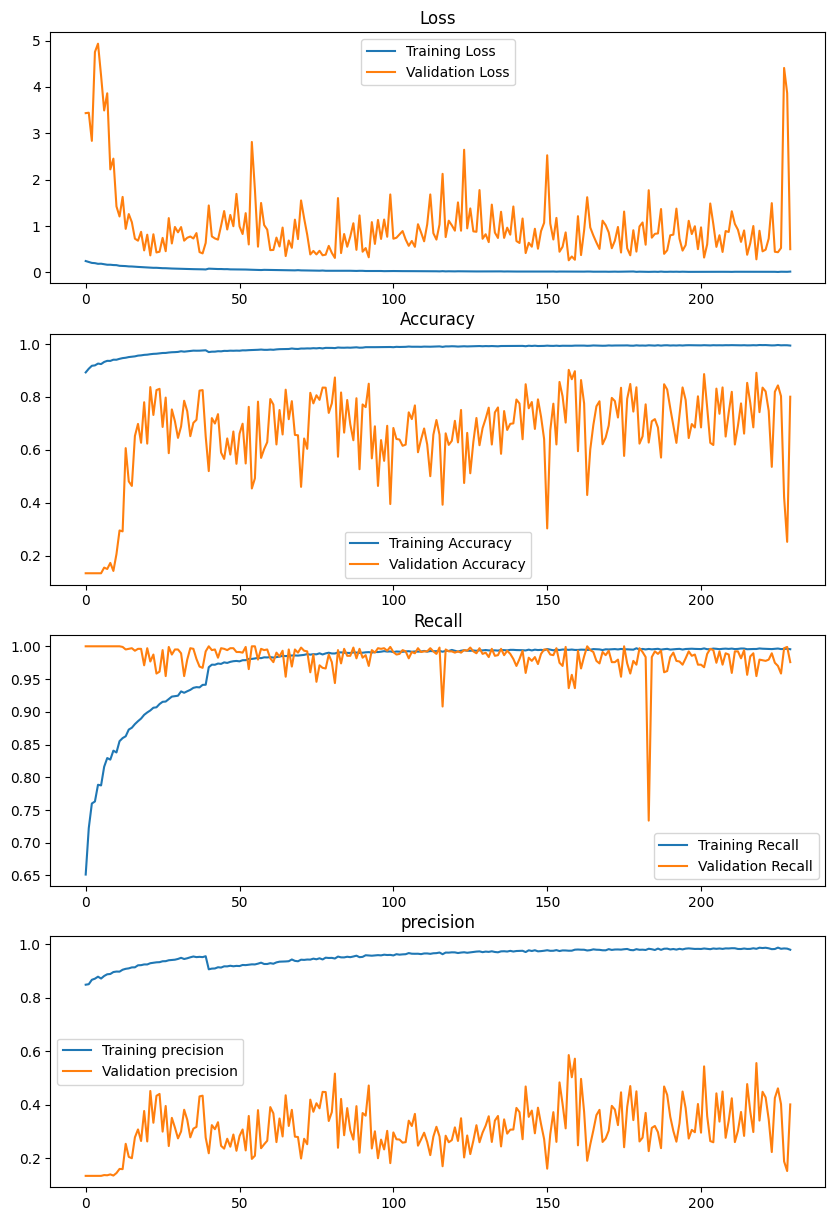

In [29]:
plot_histories([model_g_history.history,model_g_history2.history, model_g_history3.history ], False)

In [31]:
pd.DataFrame(model_g_history.history)
model_g_history.history

{'accuracy': [0.8926140666007996,
  0.9065122008323669,
  0.9175451993942261,
  0.9191122651100159,
  0.9259030818939209,
  0.9240668416023254,
  0.9320131540298462,
  0.9362237453460693,
  0.9360021352767944,
  0.9405293464660645,
  0.9404026865959167,
  0.943853497505188,
  0.9465444684028625,
  0.9479532837867737,
  0.9504859447479248,
  0.9519580602645874,
  0.9531769156455994,
  0.9559470415115356,
  0.956912636756897,
  0.9587646722793579,
  0.9595245122909546,
  0.9612973928451538,
  0.9625953435897827,
  0.9631335735321045,
  0.9643207788467407,
  0.965872049331665,
  0.966046154499054,
  0.9676924347877502,
  0.968721330165863,
  0.9691329002380371,
  0.9699718356132507,
  0.9724095463752747,
  0.9708899259567261,
  0.9720454812049866,
  0.973375141620636,
  0.9747681021690369,
  0.9744515419006348,
  0.9746097922325134,
  0.9752113223075867,
  0.9760502576828003],
 'loss': [0.2458900660276413,
  0.22639349102973938,
  0.20579253137111664,
  0.20071589946746826,
  0.1860972046

# Loading the test dataset
Loaded the test dataset towards the end so that we can have extra memory while training the models 

In [32]:
test_dataset = create_tf_dataset(test_data, 32)

# Evaluating the best model against test data

In [35]:
# latest model 
loss, accuracy,precision, recall = model_g_custom.evaluate(test_dataset)

print("Loss: ", loss) 			# 
print("Accuracy: ", accuracy) 	# 
print("Recall: ", recall) 		# 
print('Precision = ', precision)


241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8129 - loss: 0.4993 - precision: 0.3945 - recall: 0.9876
Loss:  0.511125922203064
Accuracy:  0.810596227645874
Recall:  0.9845520257949829
Precision =  0.39899832010269165


2024-05-11 17:11:29.307188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 17:11:29.307301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [37]:
# best model in terms of loss 
loaded_model = create_googlenet_v2()
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(name='recall'), Precision(name='precision')])
loaded_model.load_weights("./v2_best_val_loss_checkpoint.keras")

loss, accuracy, precision, recall = loaded_model.evaluate(test_dataset)

print("Loss: ", loss) 			# 
print("Accuracy: ", accuracy) 	# 
print("Recall: ", recall) 		# 
print("Precision: ", precision)


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 242 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8997 - loss: 0.2866 - precision: 0.5628 - recall: 0.9333
Loss:  0.27796223759651184
Accuracy:  0.9018484950065613
Recall:  0.9351184368133545
Precision:  0.5678548812866211


2024-05-11 17:12:07.284975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 17:12:07.285188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


In [38]:
# best model in terms of recall 
loaded_model = create_googlenet_v2()
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(name='recall'), Precision(name='precision')])
loaded_model.load_weights("./v2_best_val_recall_checkpoint.keras")

loss, accuracy, precision, recall = loaded_model.evaluate(test_dataset)

print("Loss: ", loss) 			# 
print("Accuracy: ", accuracy) 	# 
print("Recall: ", recall) 		# 
print("Precision: ", precision) # 


241/241 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6428 - loss: 1.6932 - precision: 0.2329 - recall: 0.7630
Loss:  1.7110689878463745
Accuracy:  0.638896107673645
Recall:  0.7559217214584351
Precision:  0.224396213889122


2024-05-11 17:12:19.153204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 17:12:19.153456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
